In [1]:
## general libraries 
import os,sys,glob
import numpy as np
import pandas as pd
import xarray as xr
import h5py

# for plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

print(f'Using Python  = {sys.version.split()[0]}')

Using Python  = 3.8.8


In [2]:
from itertools import chain

#### We will use the following coordinates:
- latitude = 84
- longitude = 17.5

##### Upload datasets 

In [3]:
path = '//storage/ddiaz/2023/myProject/data/'
file_sl = 'era5_monthly_avg_sl_2005-2020_tisr_tciw_tclw_tcwv_hcc_mcc_lcc_sp_tco3_fal_tsr.nc'
file_pl= 'era5_monthly_avg_pl_2015-2020_cc_ciwc_clwc.nc'

In [4]:
xrr_pl = xr.open_dataset(path+file_pl)
xrr_pl_even = xrr_pl.sel(time = ['2016','2018','2020'])

#### single levels

In [5]:
p = xrr_pl.level.values

#### pressure levels

In [6]:
dp = []
for ii in np.arange(len(p)-1):
    DP = p[ii+1]-p[ii]
    dp.append(DP)

In [7]:
#We add one value to dP so every level of pressure has a dP value
dp.insert(0,100)   

#### Optical depth 

$ \tau_c = \frac{3}{2} \int   \frac{\rho q_l}{r_e}dz $

In [8]:
effradliq = 10
effradice = 25
H=9000

In [9]:
data_arrays_ice = []

for ii in np.arange(18):
    P = p[ii]
    DP = dp[ii]
    xrr = xrr_pl.sel(level = P)
    tauice_c = (3/2) * (1*xrr.ciwc/effradice)*(DP/P*H)
    data_arrays_ice.append(tauice_c)

In [10]:
del xrr_pl

In [11]:
xrr_tauice = xr.concat(data_arrays_ice,dim='level')

In [12]:
del data_arrays_ice

In [13]:
df_tauice = xrr_tauice.to_dataframe()

In [14]:
del xrr_tauice

In [15]:
df_tauice.to_csv('tau_ice_3years.csv')

In [45]:
eff_tau_liq = TAUliq_c* prtrbd_fluxes.cc
eff_tau_ice = TAUice_c* prtrbd_fluxes.cc

In [48]:
prtrbd_fluxes['tau_liq'] = TAUliq_c 
prtrbd_fluxes['tau_ice'] = TAUice_c
prtrbd_fluxes['eff_tau_liq'] = eff_tau_liq
prtrbd_fluxes['eff_tau_ice'] = eff_tau_ice
prtrbd_fluxes['cwp'] = cwp_prtrbd

In [77]:
prtrbd_fluxes.to_csv('data.csv', index=False)

##### surface plot

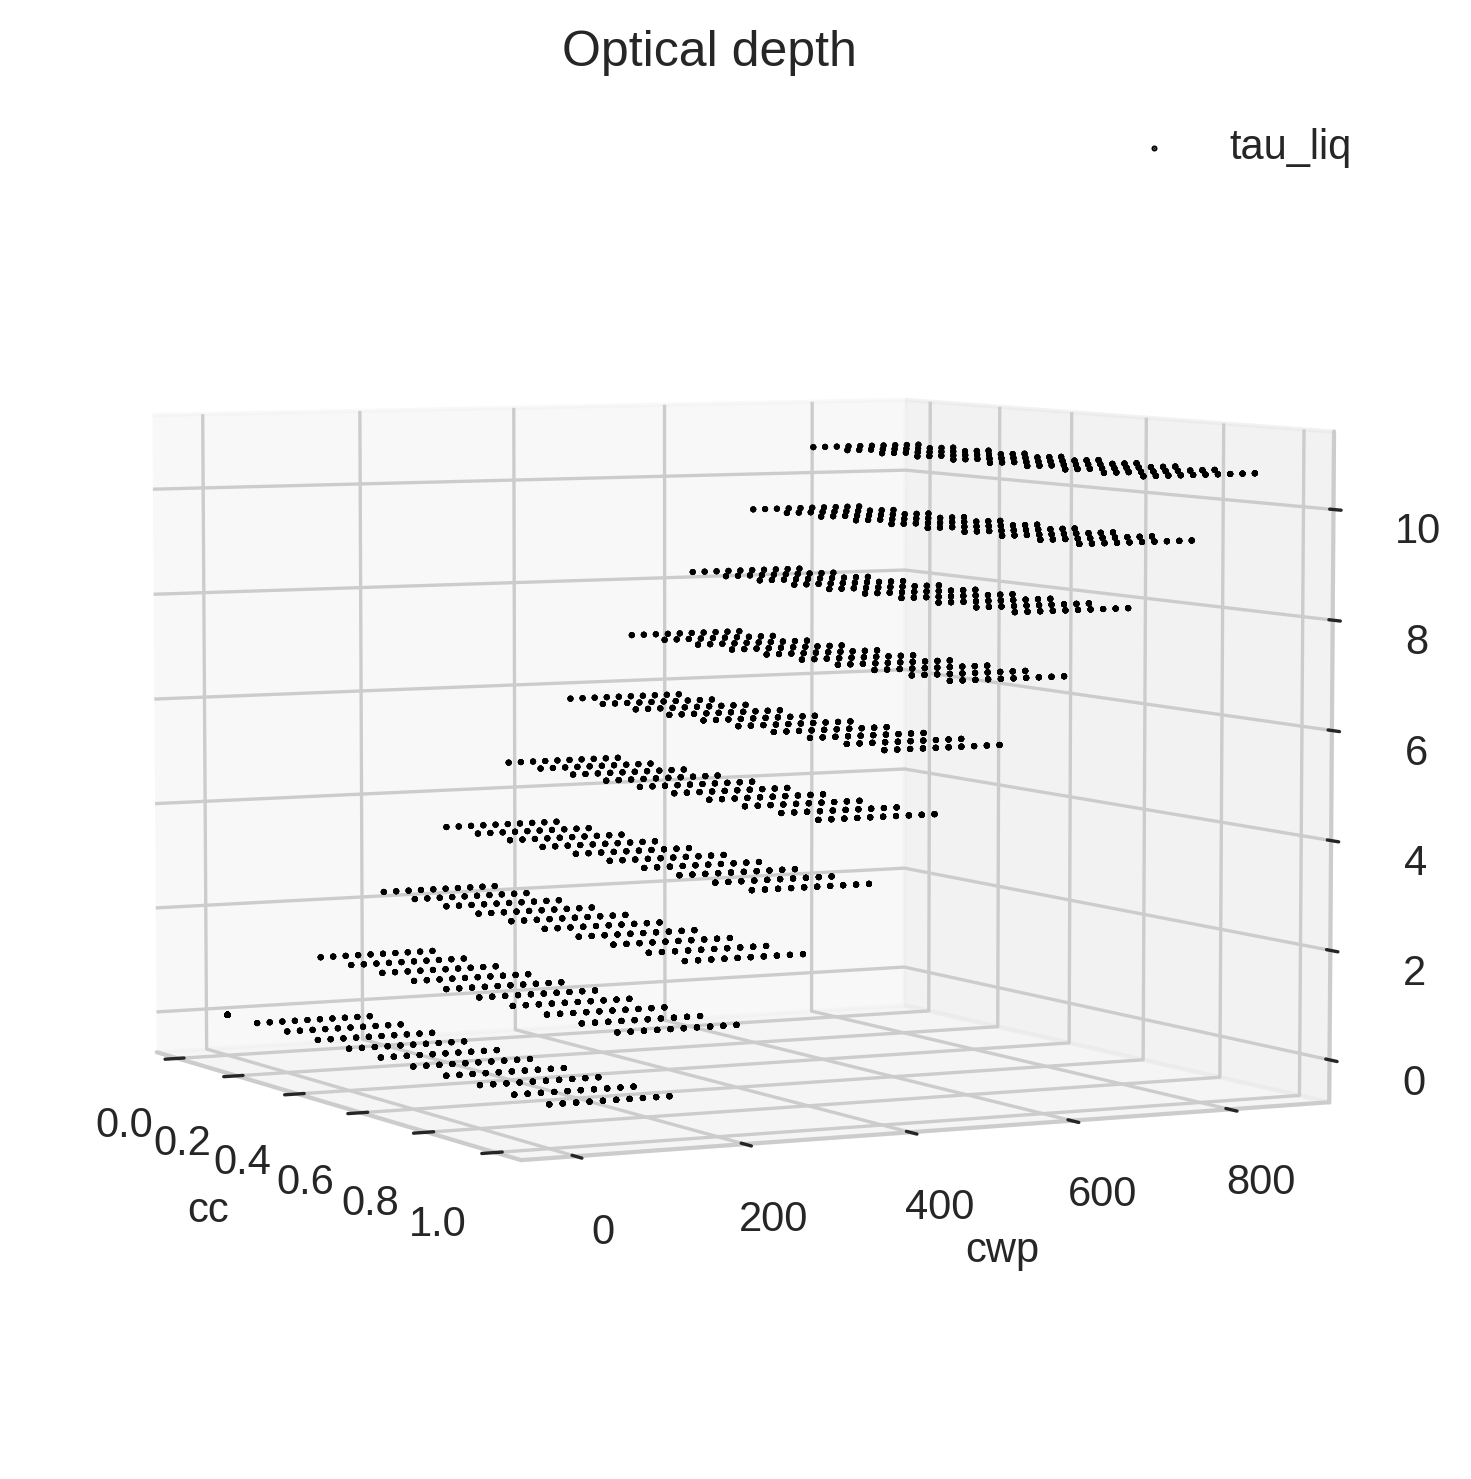

In [81]:
plt.figure(figsize=(6,6),dpi=300)

ax = plt.axes(projection='3d')
ax.scatter3D(prtrbd_fluxes.cc,prtrbd_fluxes.cwp,prtrbd_fluxes.tau_liq,label='tau_liq',s=0.2, color='k')
#ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

plt.legend(loc='upper right')
plt.title('Optical depth')
plt.xlabel('cc')
plt.ylabel('cwp')

ax.view_init(5, 333) #333

plt.show()

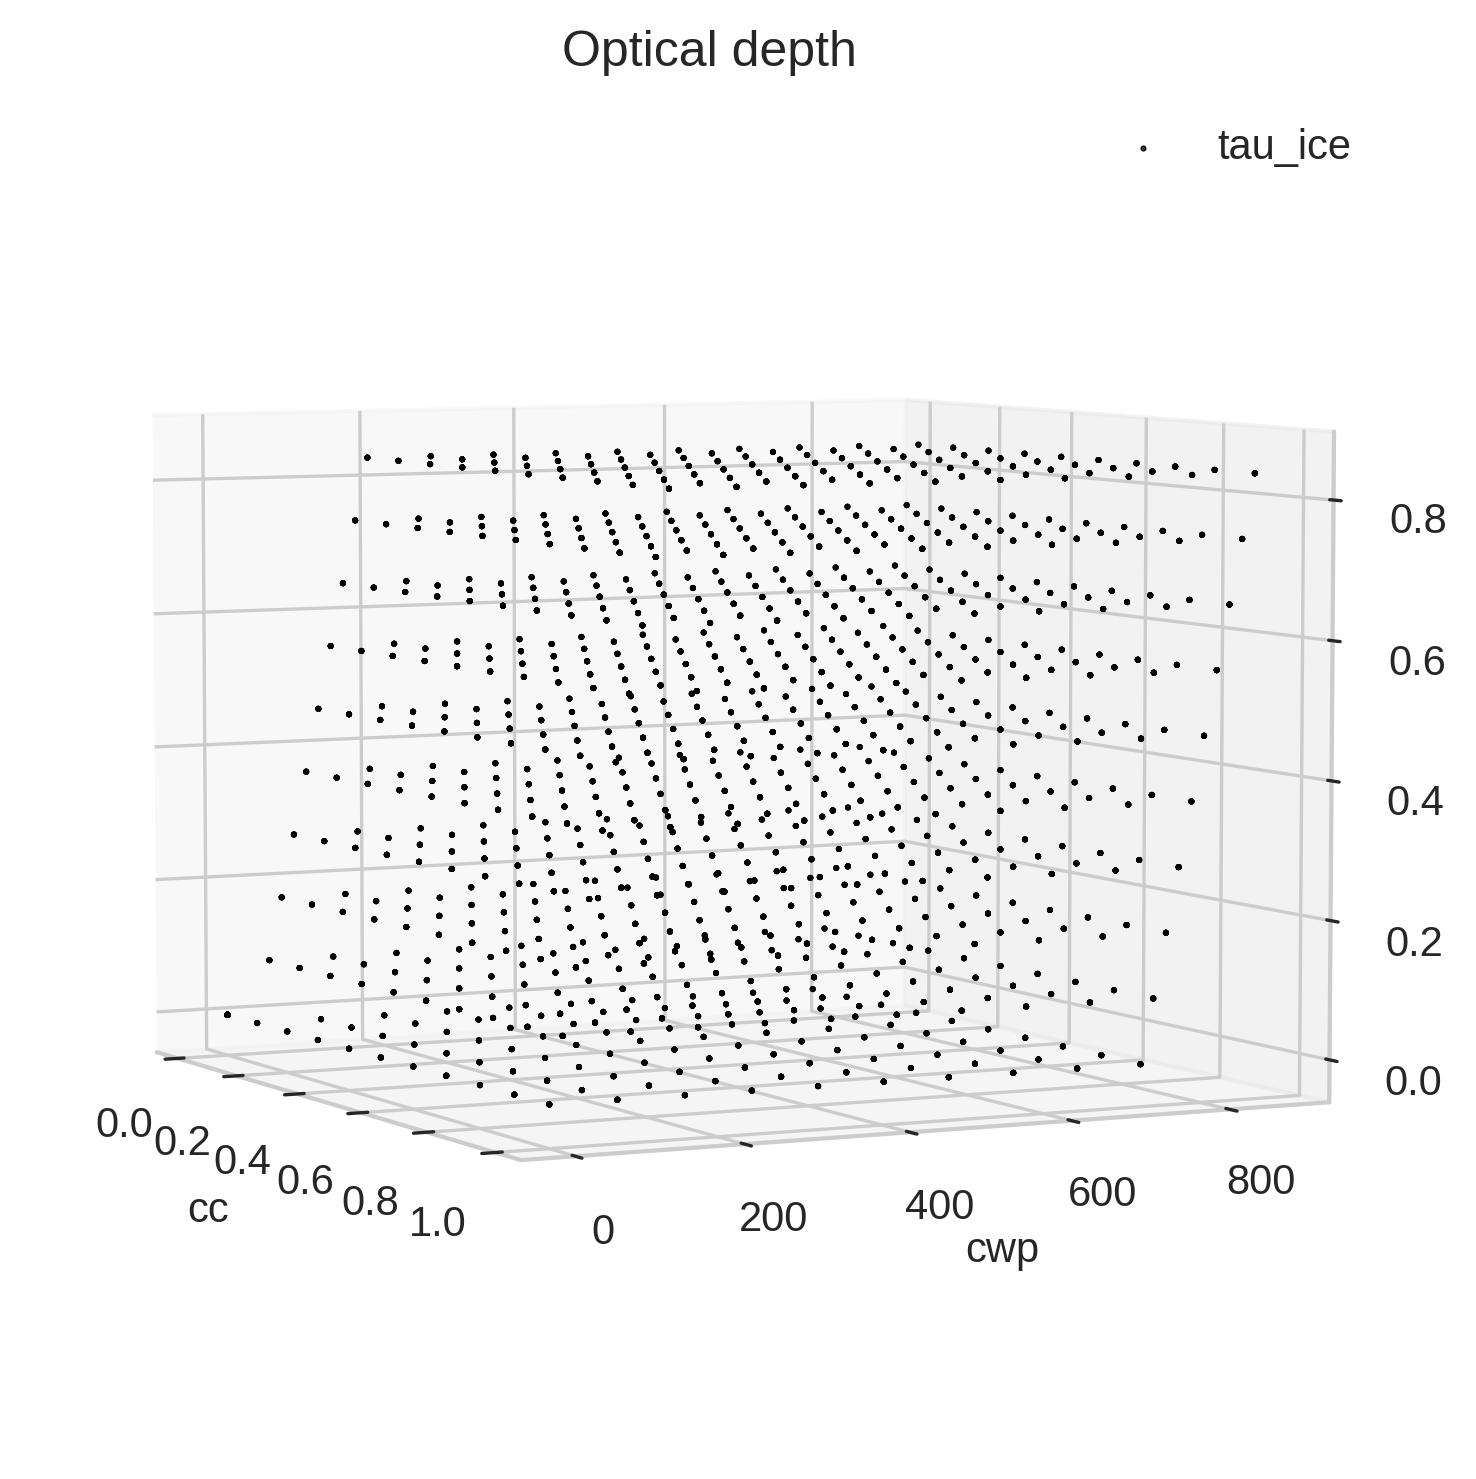

In [82]:
plt.figure(figsize=(6,6),dpi=300)

ax = plt.axes(projection='3d')
ax.scatter3D(prtrbd_fluxes.cc,prtrbd_fluxes.cwp,prtrbd_fluxes.tau_ice,label='tau_ice',s=0.2, color='k')
#ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

plt.legend(loc='upper right')
plt.title('Optical depth')
plt.xlabel('cc')
plt.ylabel('cwp')

ax.view_init(5, 333) #333

plt.show()

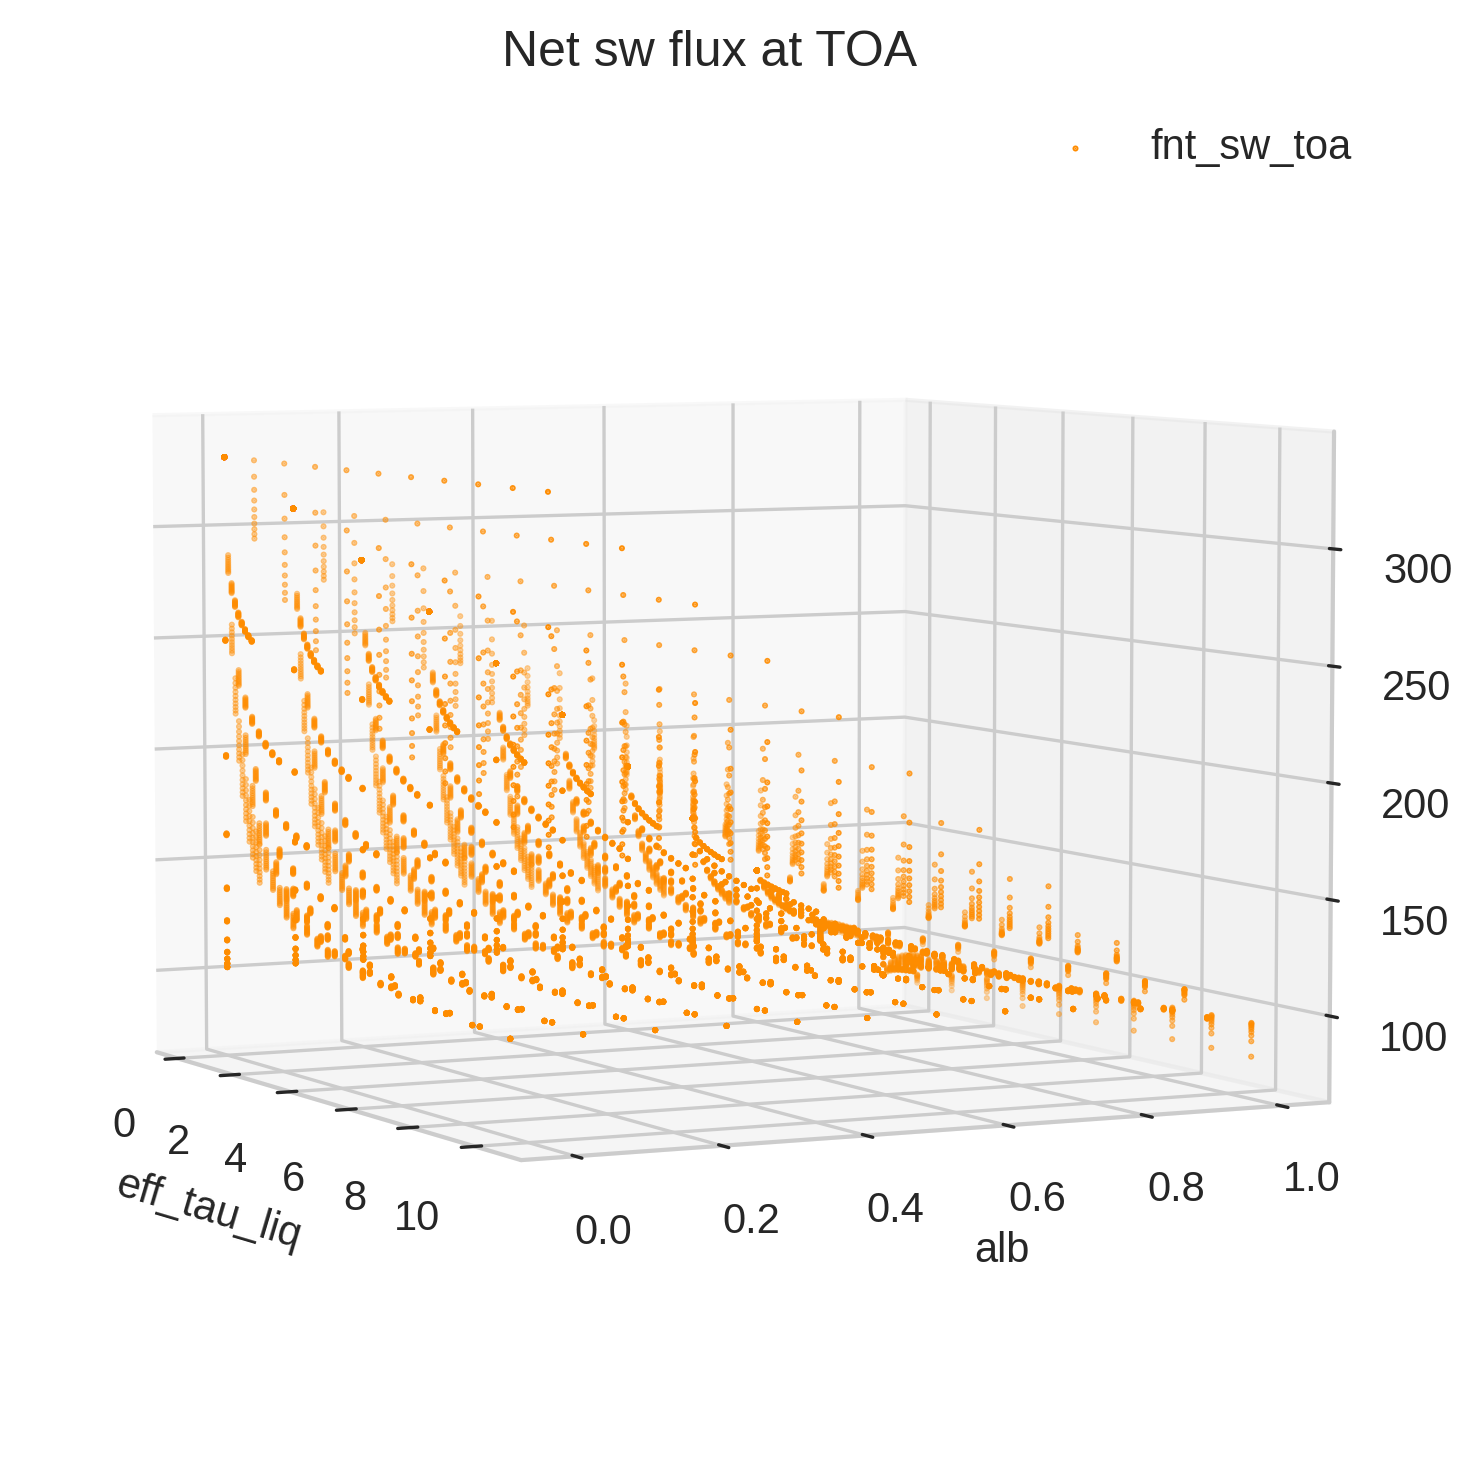

In [83]:
plt.figure(figsize=(6,6),dpi=300)

ax = plt.axes(projection='3d')
ax.scatter3D(prtrbd_fluxes.eff_tau_liq,prtrbd_fluxes.albedo,prtrbd_fluxes.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'darkorange')
#ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

plt.legend(loc='upper right')
plt.title('Net sw flux at TOA')
plt.xlabel('eff_tau_liq')
plt.ylabel('alb')

ax.view_init(5, 333) #333

plt.show()

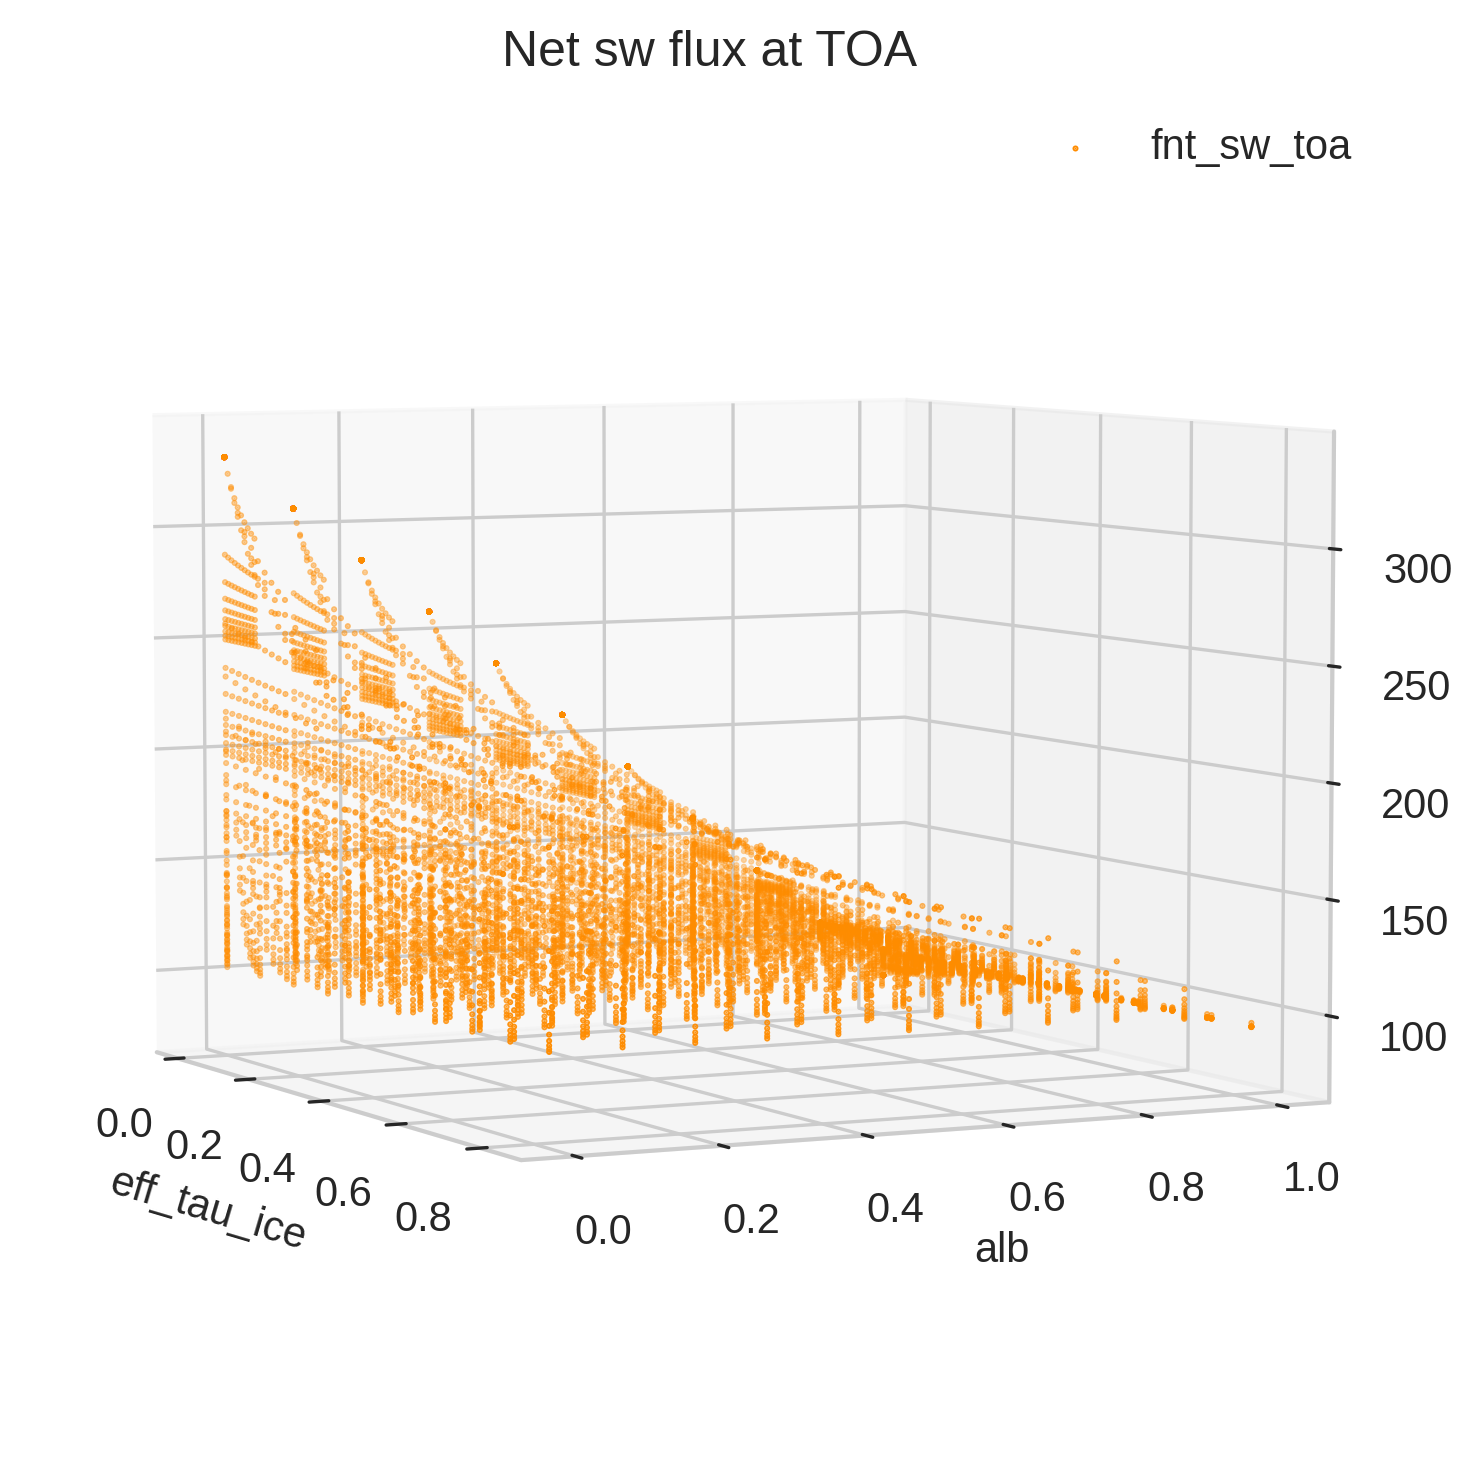

In [84]:
plt.figure(figsize=(6,6),dpi=300)

ax = plt.axes(projection='3d')
ax.scatter3D(prtrbd_fluxes.eff_tau_ice,prtrbd_fluxes.albedo,prtrbd_fluxes.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'darkorange')
#ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

plt.legend(loc='upper right')
plt.title('Net sw flux at TOA')
plt.xlabel('eff_tau_ice')
plt.ylabel('alb')

ax.view_init(5, 333) #333

plt.show()

In [85]:
prtrbd_fluxes.eff_tau_ice + prtrbd_fluxes.eff_tau_liq

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
12095     9.011428
12096    10.192593
12097     0.743270
12098    11.373759
12099     1.924435
Length: 12100, dtype: float64

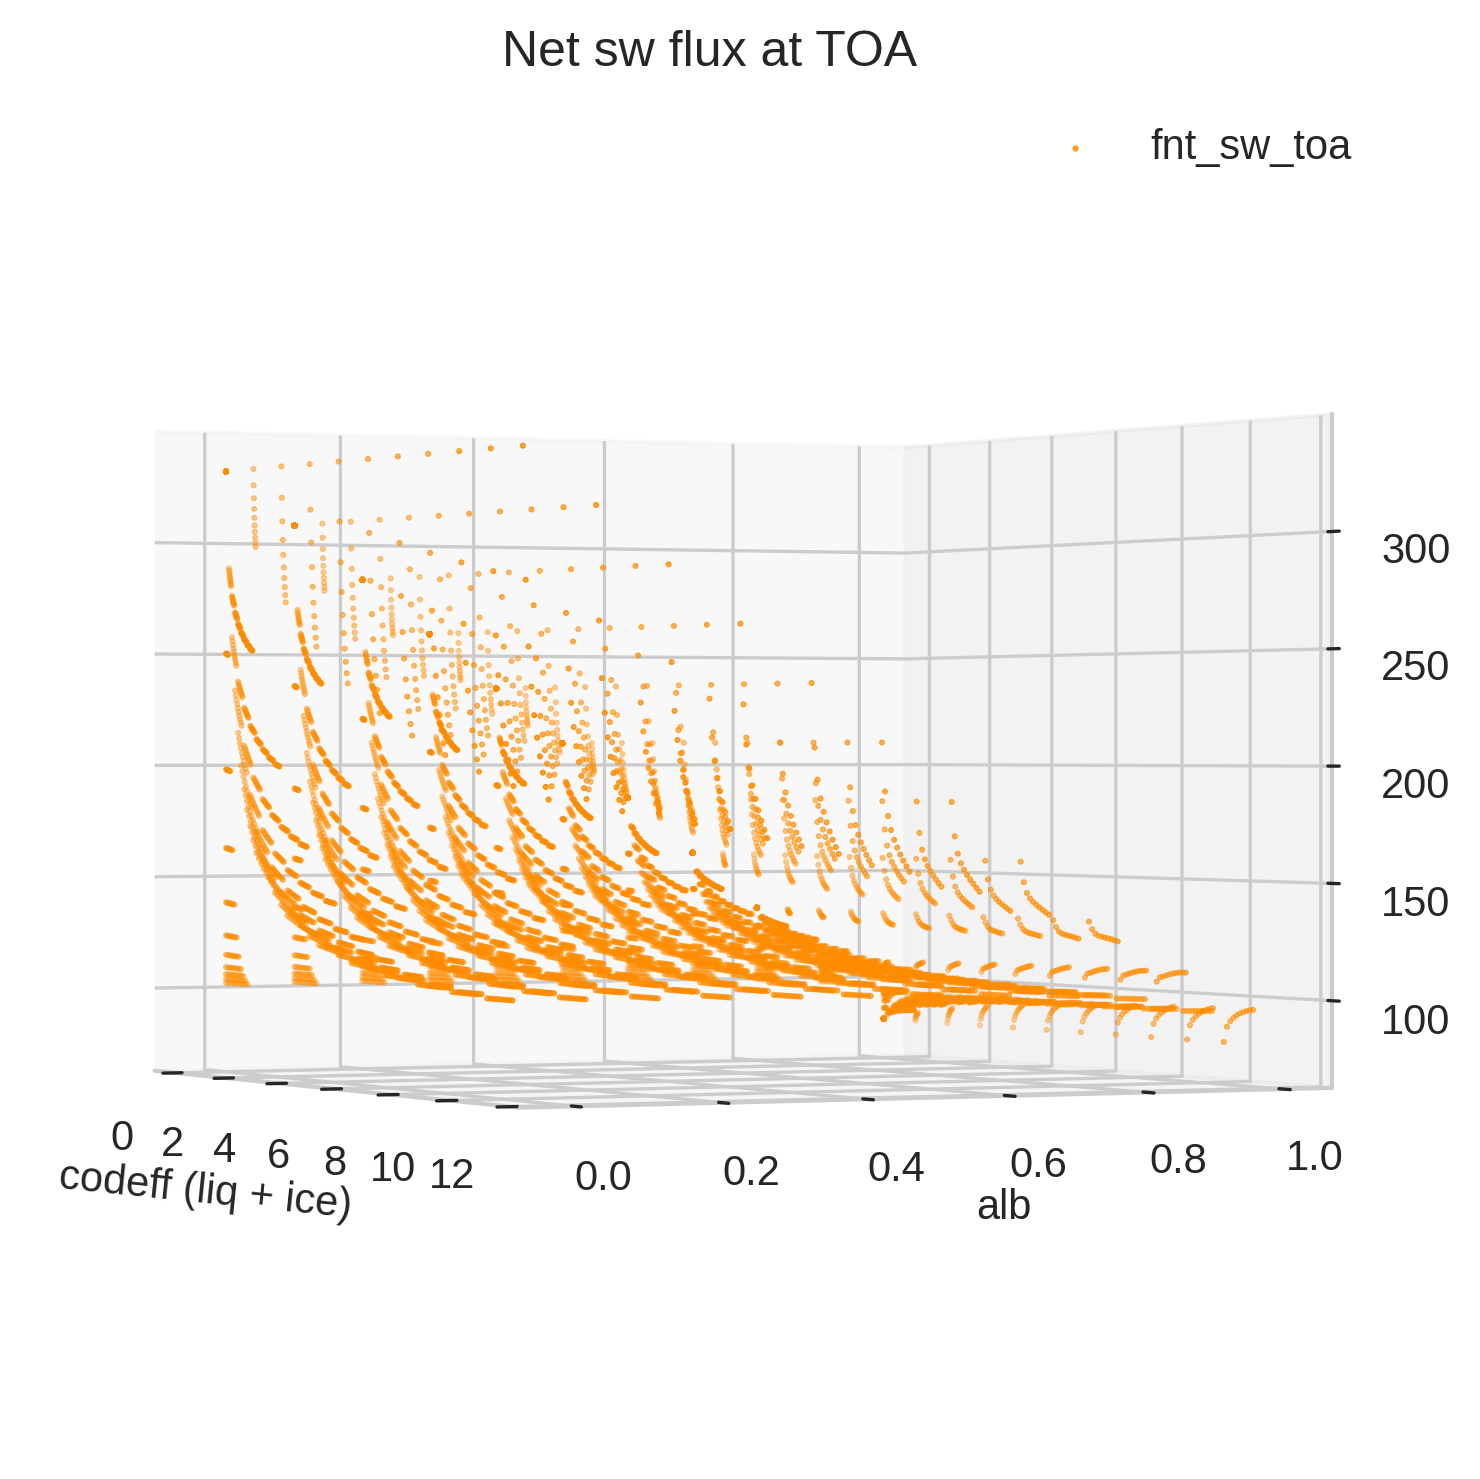

In [136]:
plt.figure(figsize=(6,6),dpi=300)

ax = plt.axes(projection='3d')
ax.scatter3D(prtrbd_fluxes.eff_tau_ice + prtrbd_fluxes.eff_tau_liq,prtrbd_fluxes.albedo,prtrbd_fluxes.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'darkorange')
#ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

plt.legend(loc='upper right')
plt.title('Net sw flux at TOA')
plt.xlabel('codeff (liq + ice)')
plt.ylabel('alb')

ax.view_init(0, 333) #333

plt.show()

##### Now we want to select specific ciwc or clwc values

In [87]:
ind = np.where(prtrbd_fluxes.ciwc == cciwc[0])

In [88]:
fnt = np.array(prtrbd_fluxes.fnt_sw_toa)

In [89]:
len(fnt[ind])

2200

In [90]:
I = np.array(prtrbd_fluxes.eff_tau_ice)
II = np.array(prtrbd_fluxes.eff_tau_liq)
III = np.array(prtrbd_fluxes.albedo)
IV = np.array(prtrbd_fluxes.fnt_sw_toa)

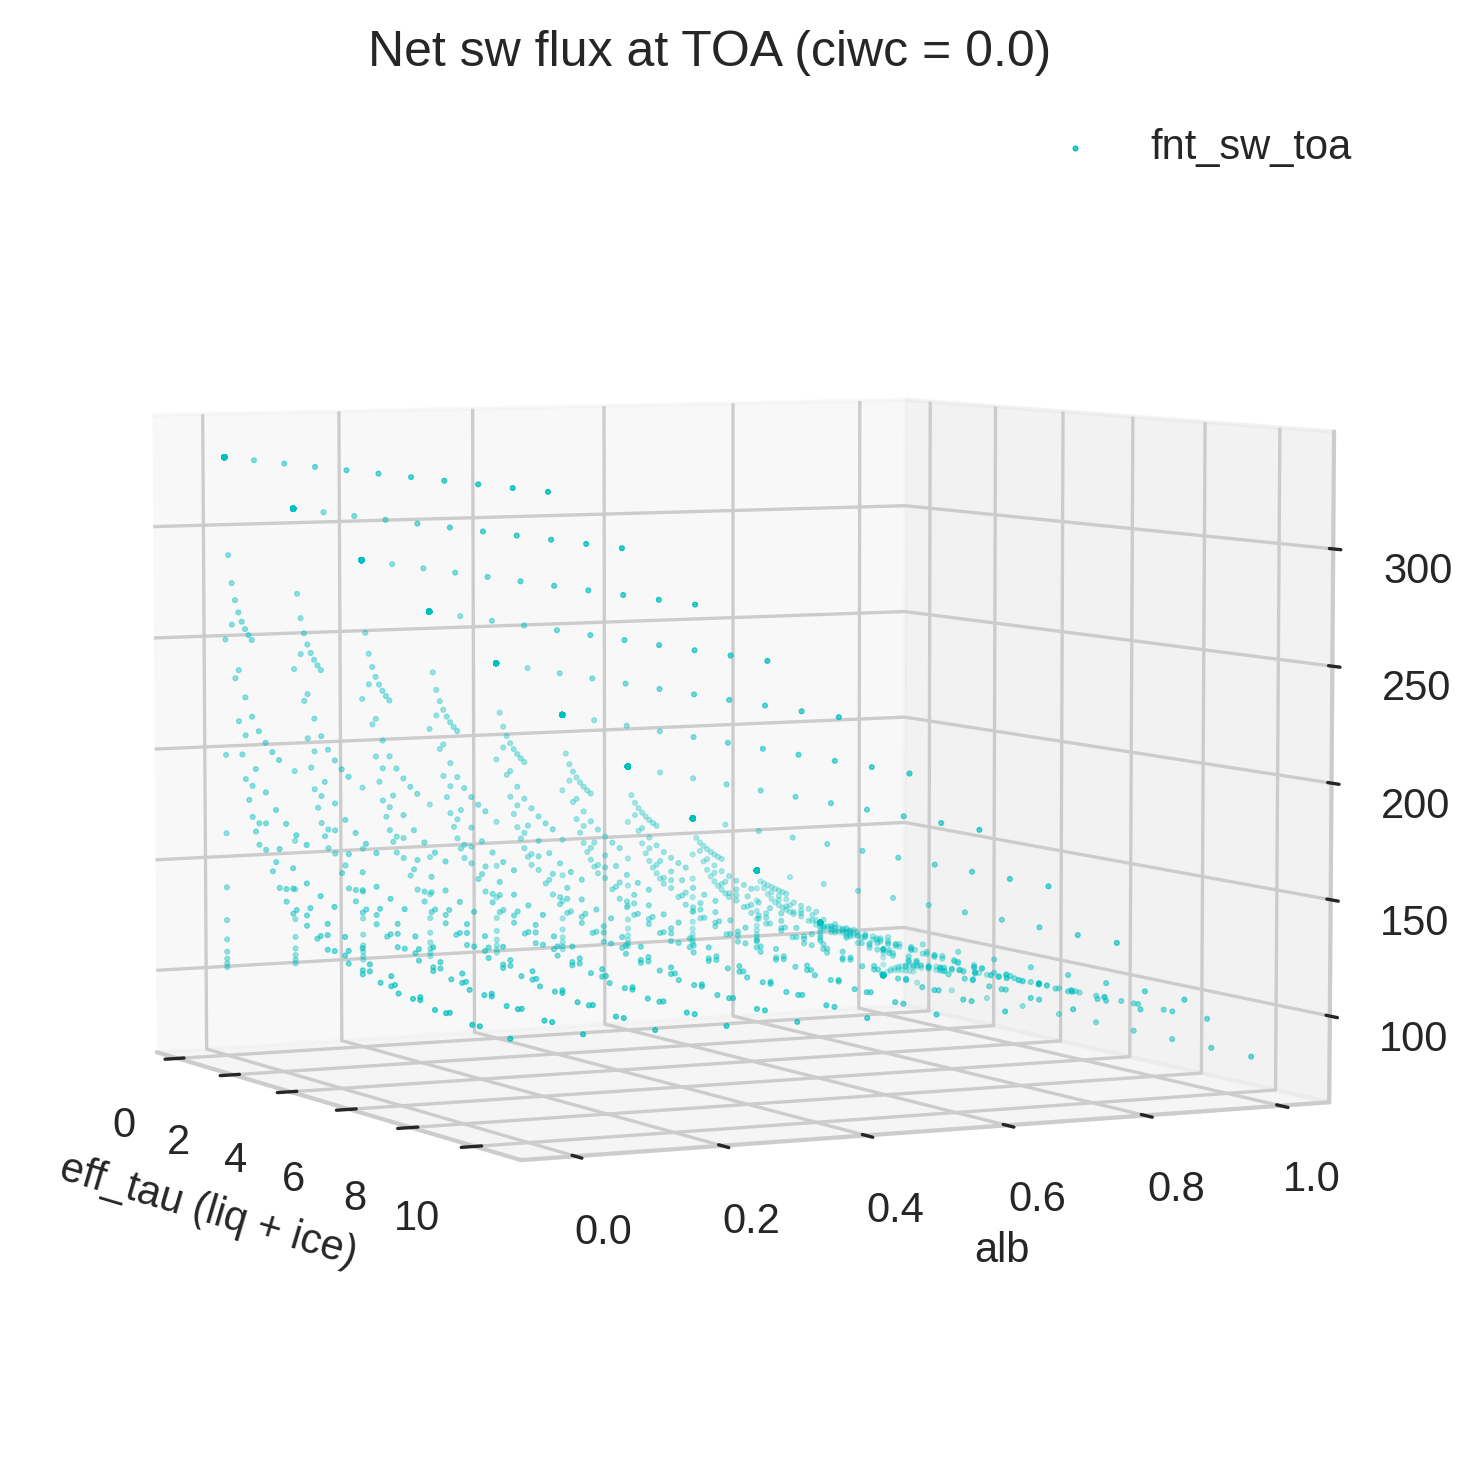

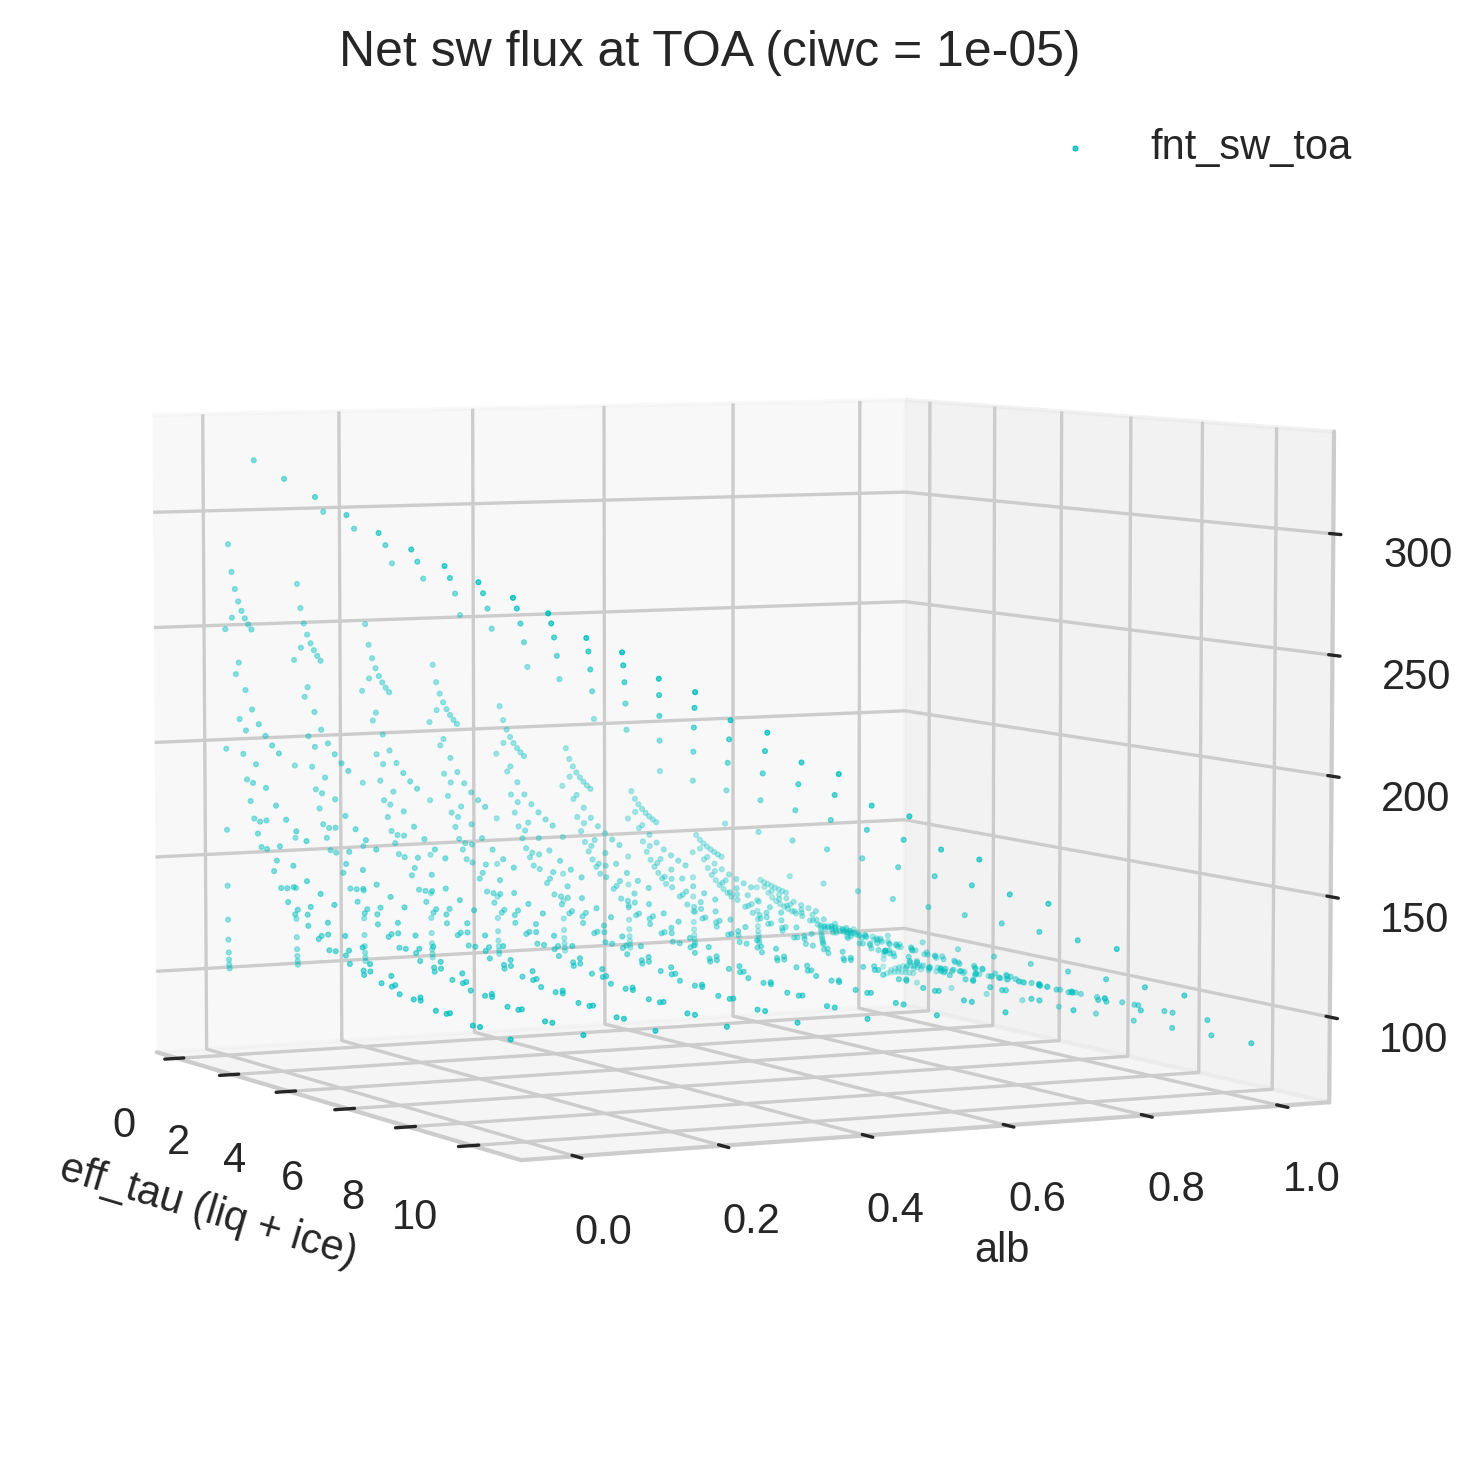

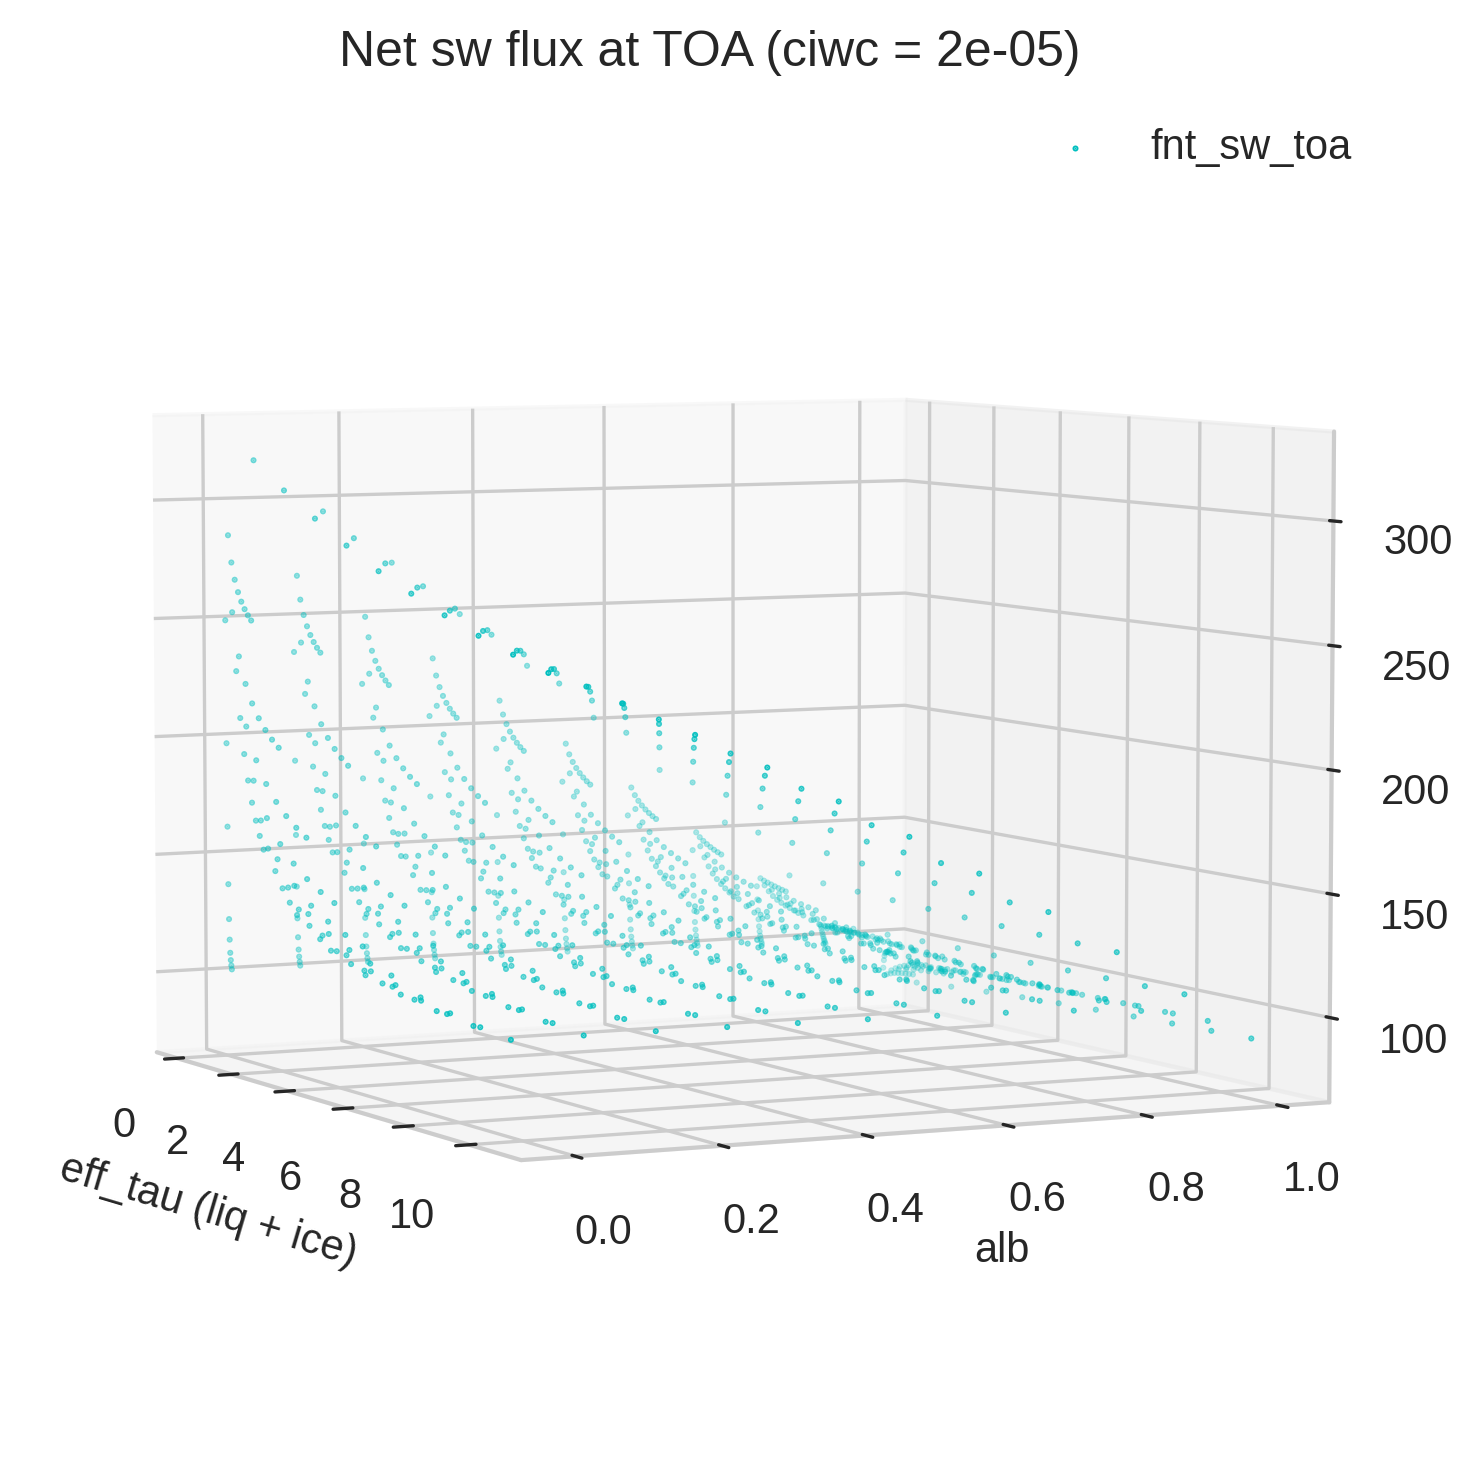

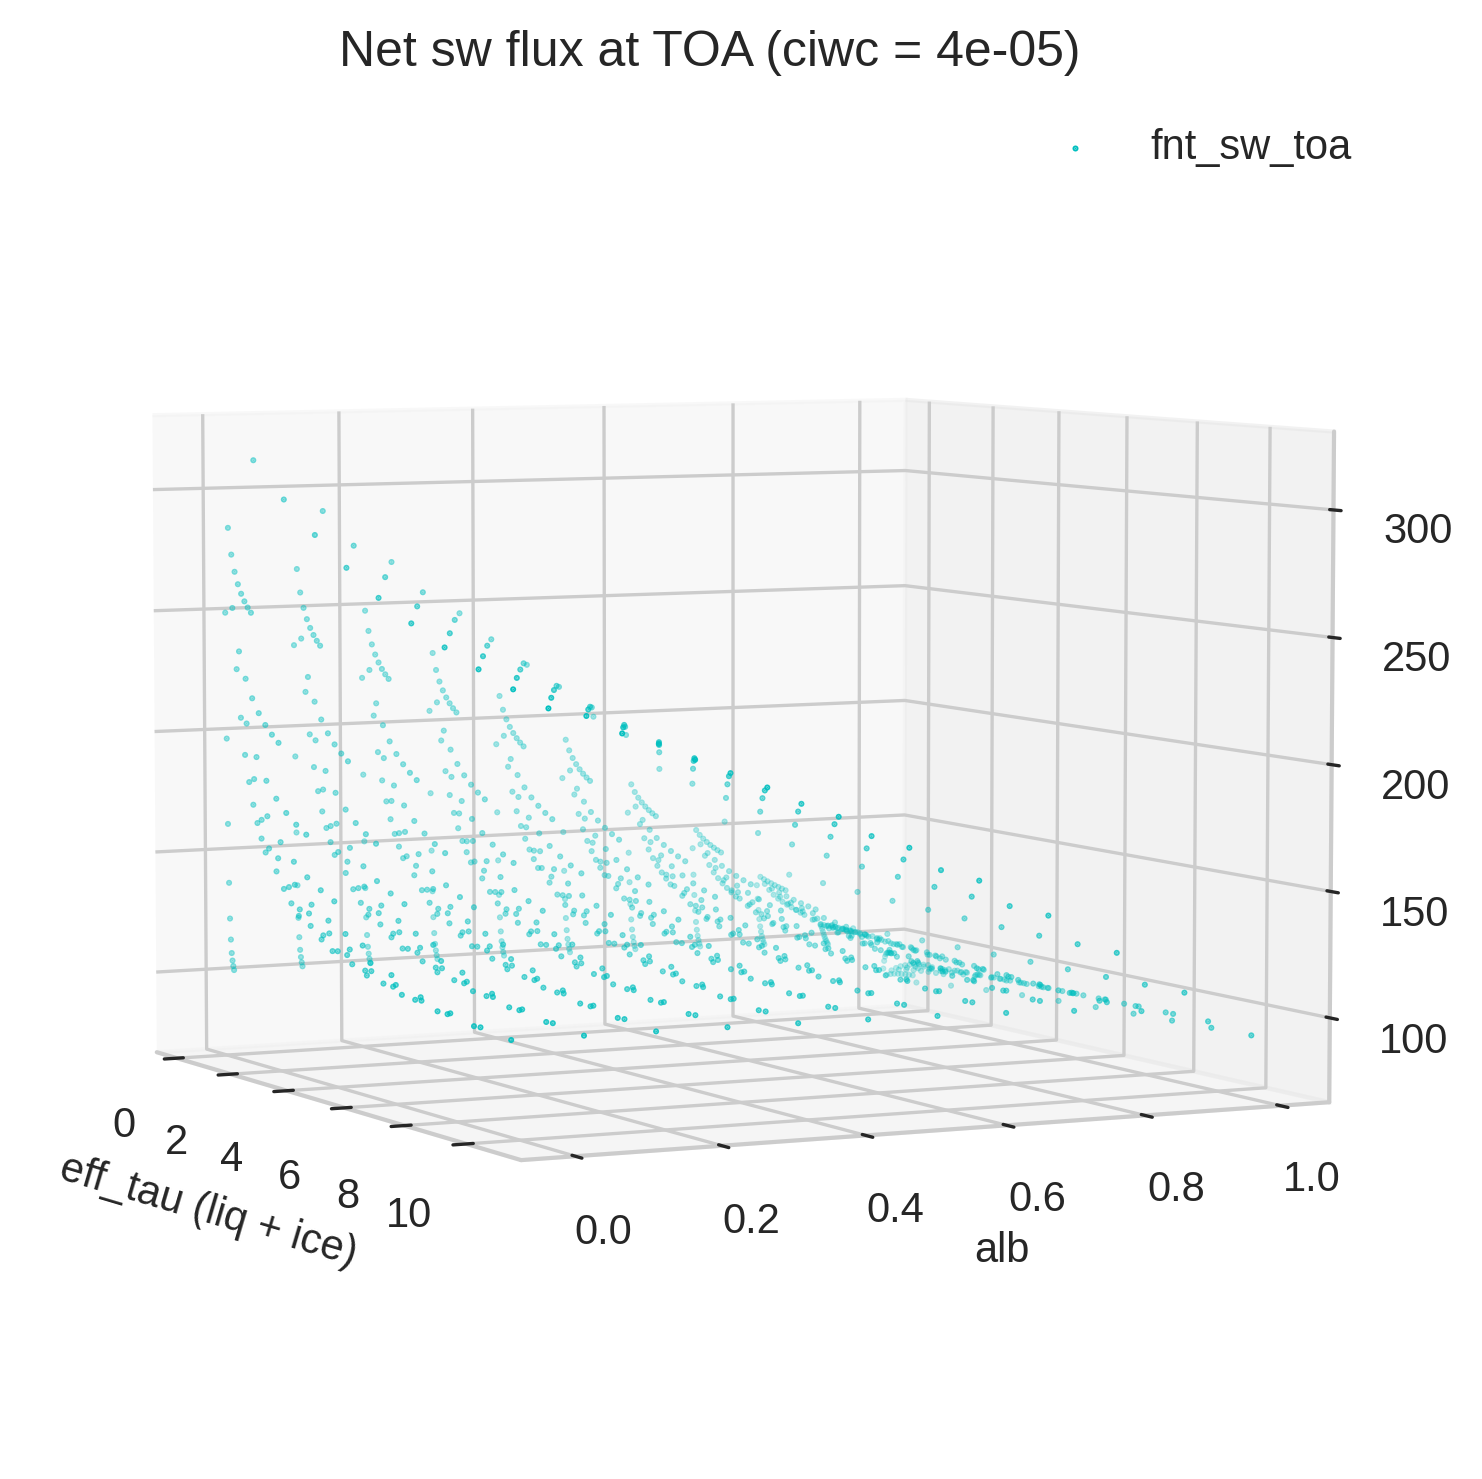

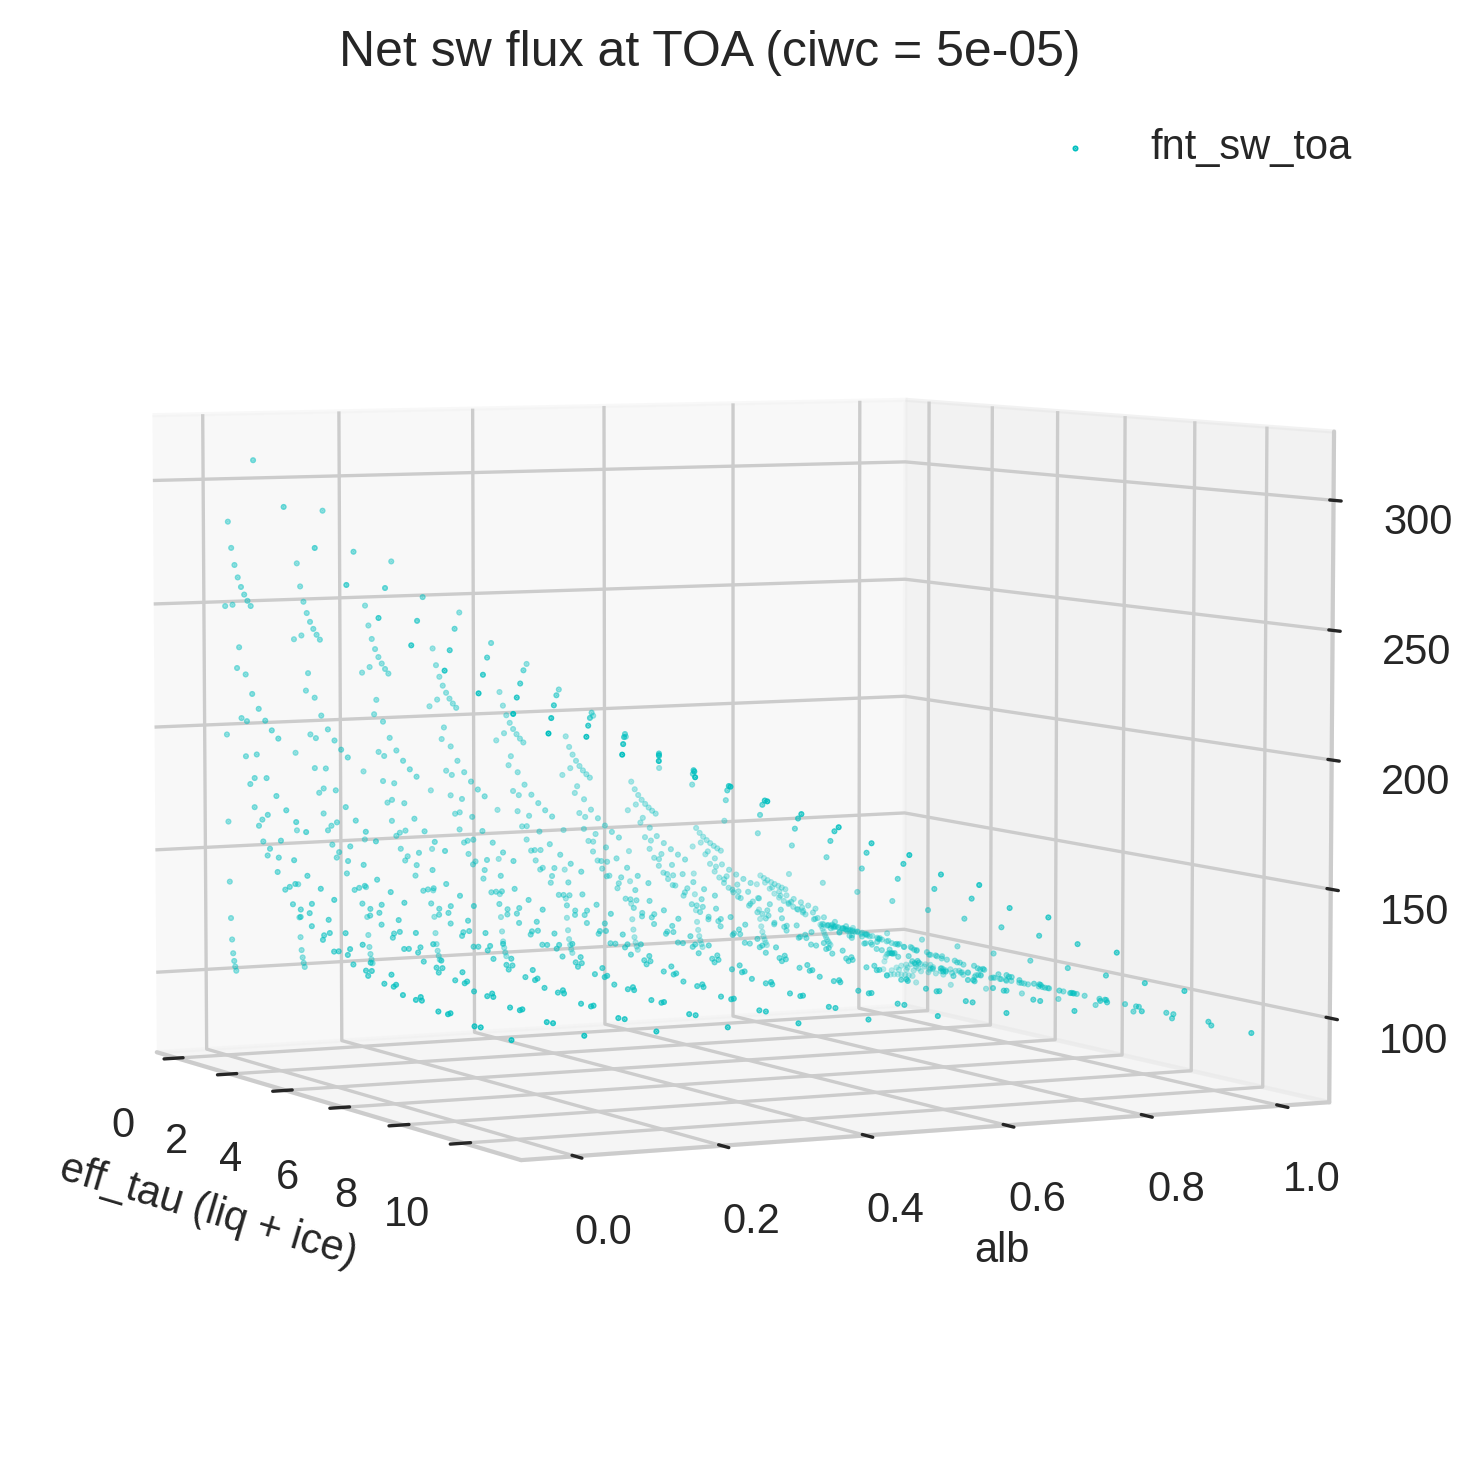

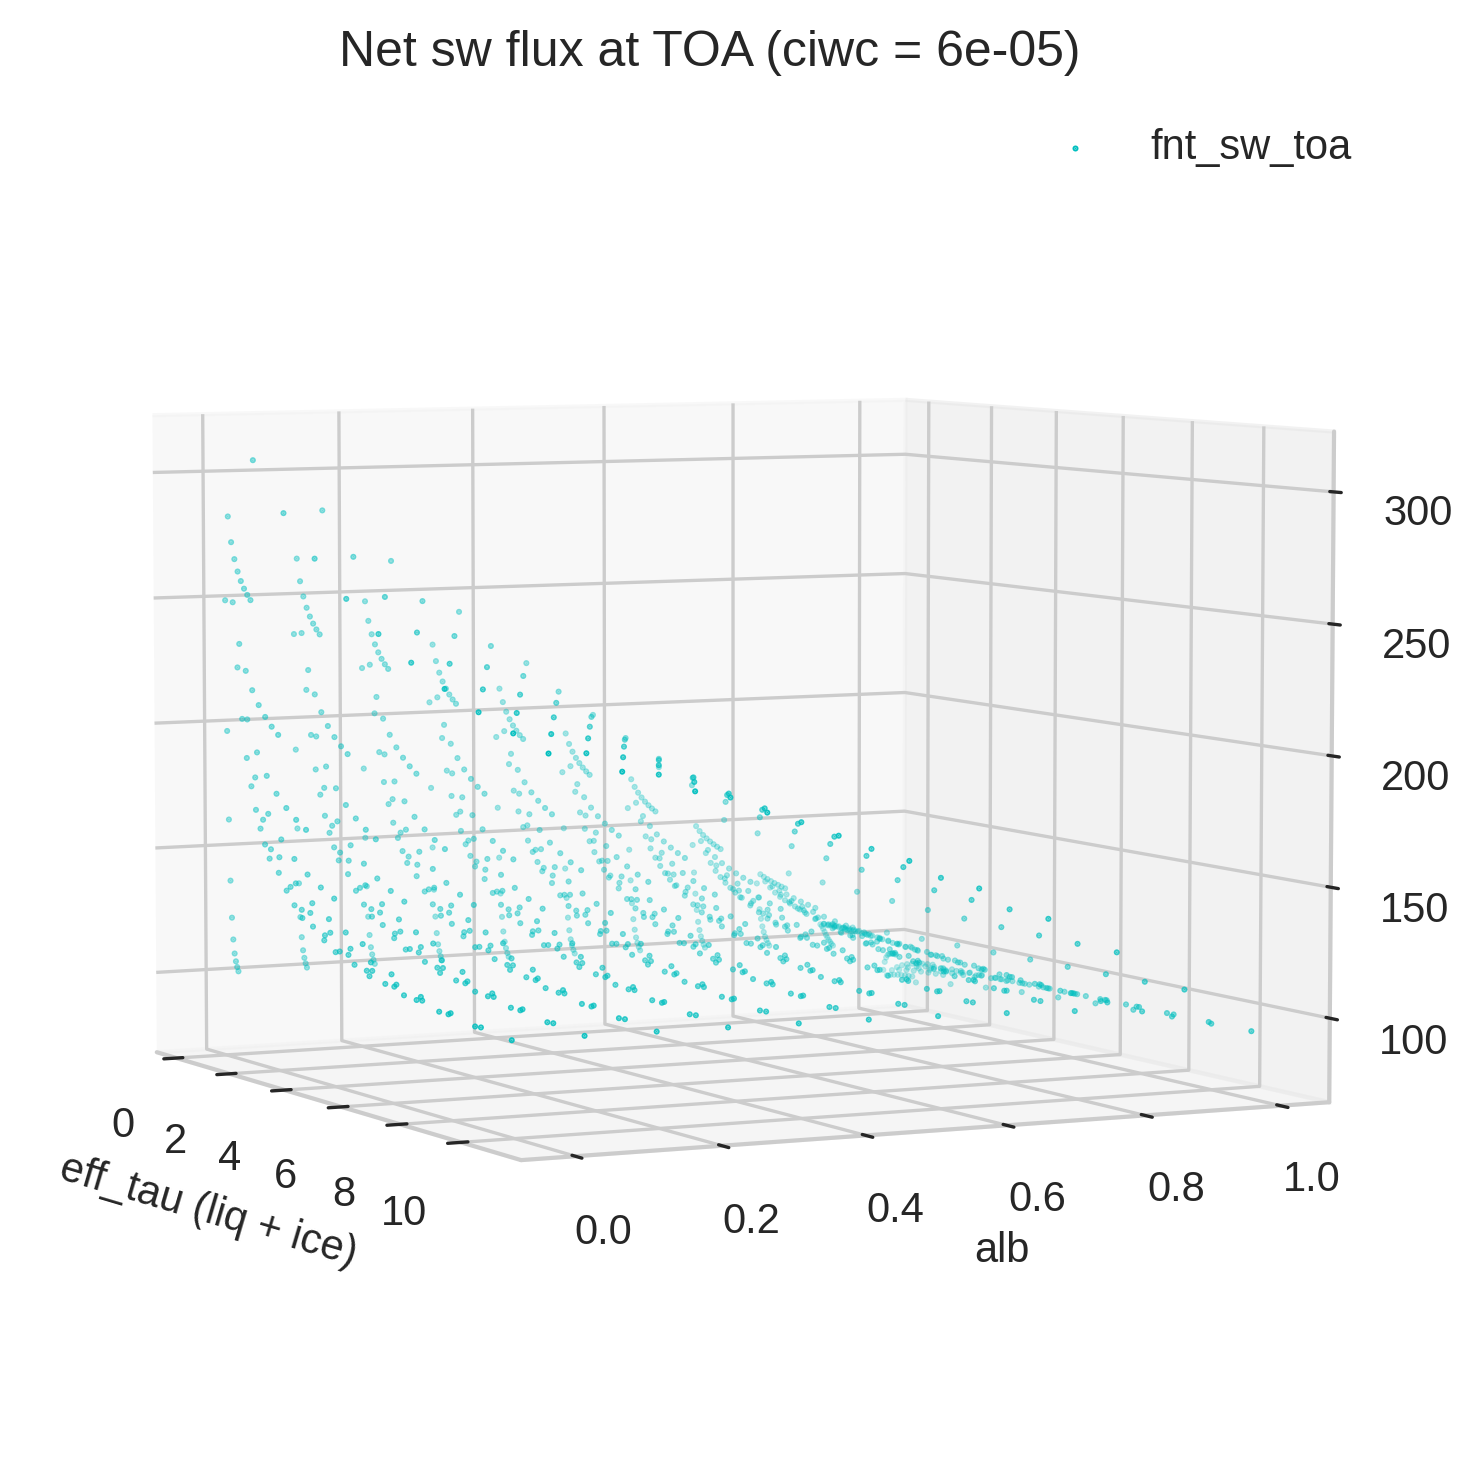

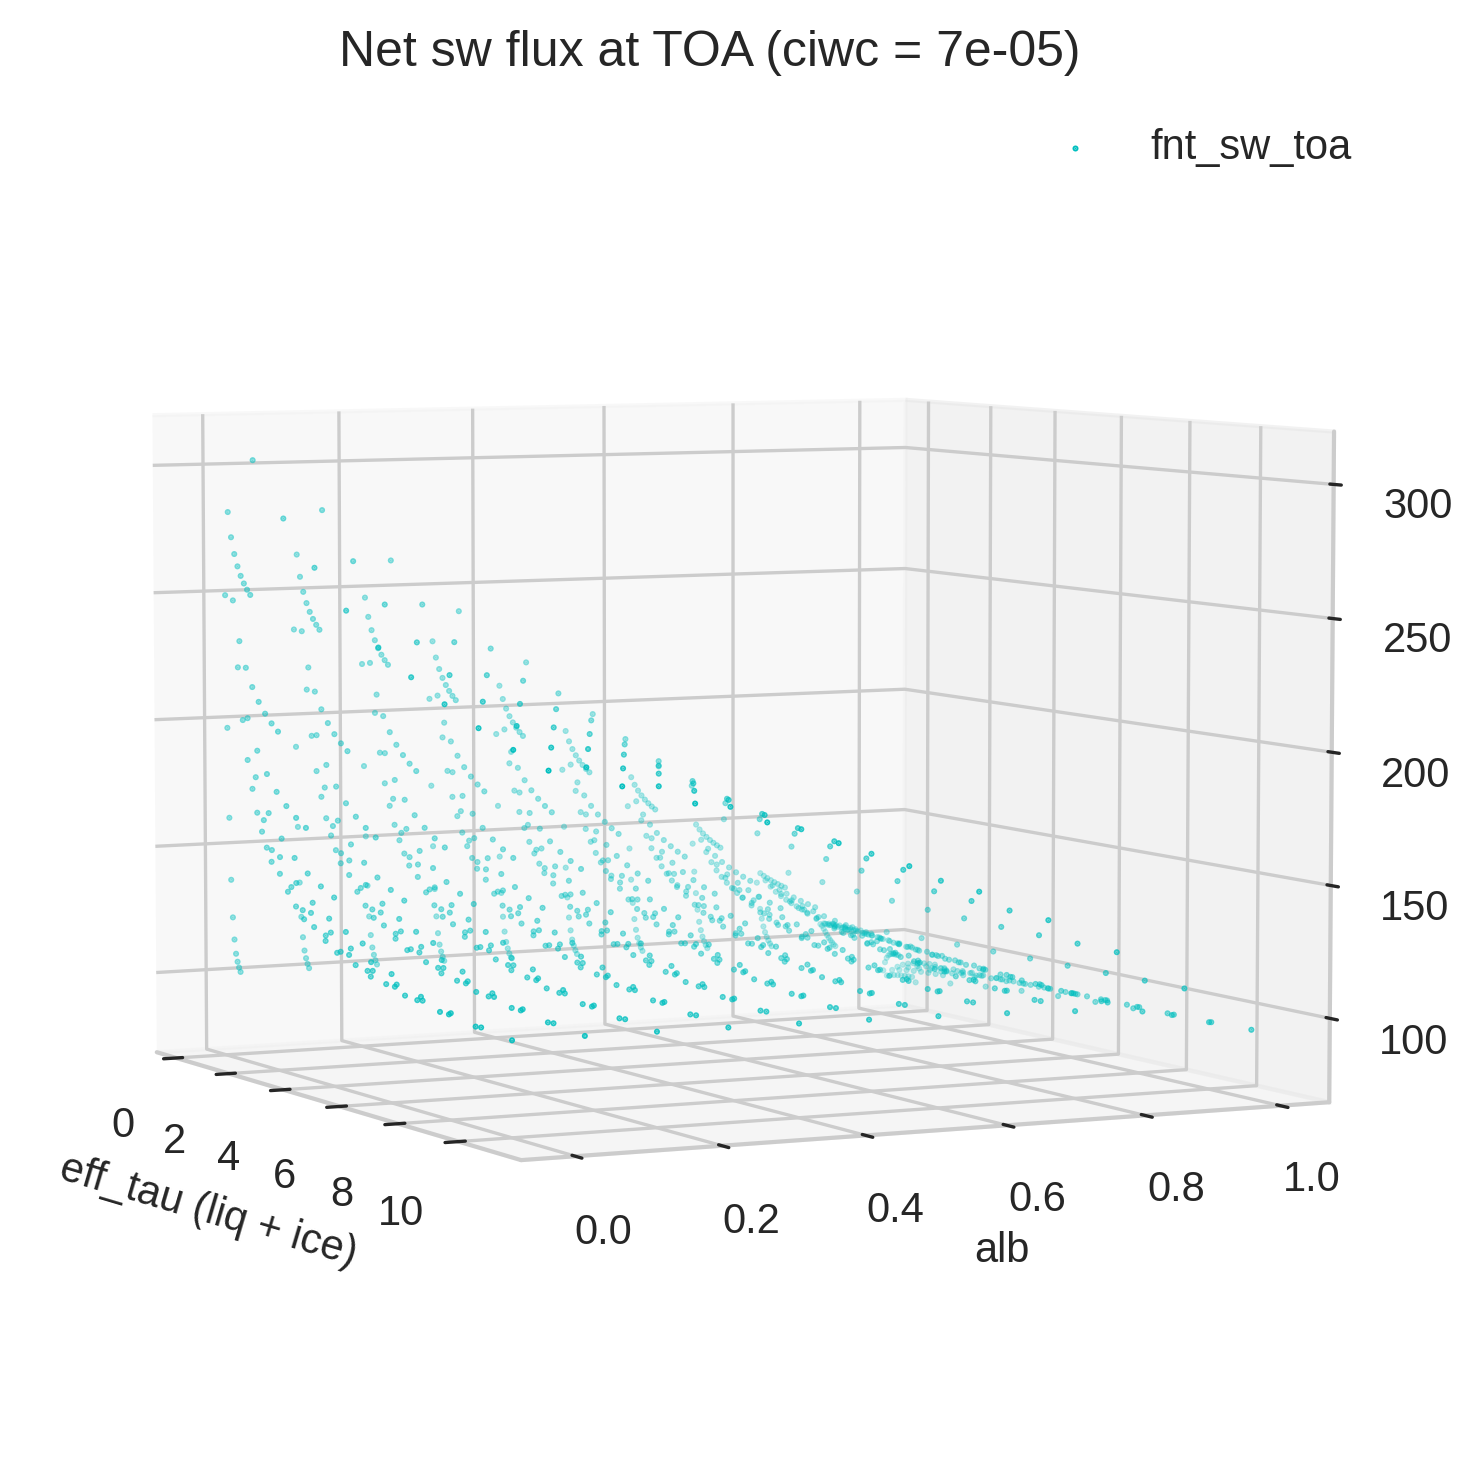

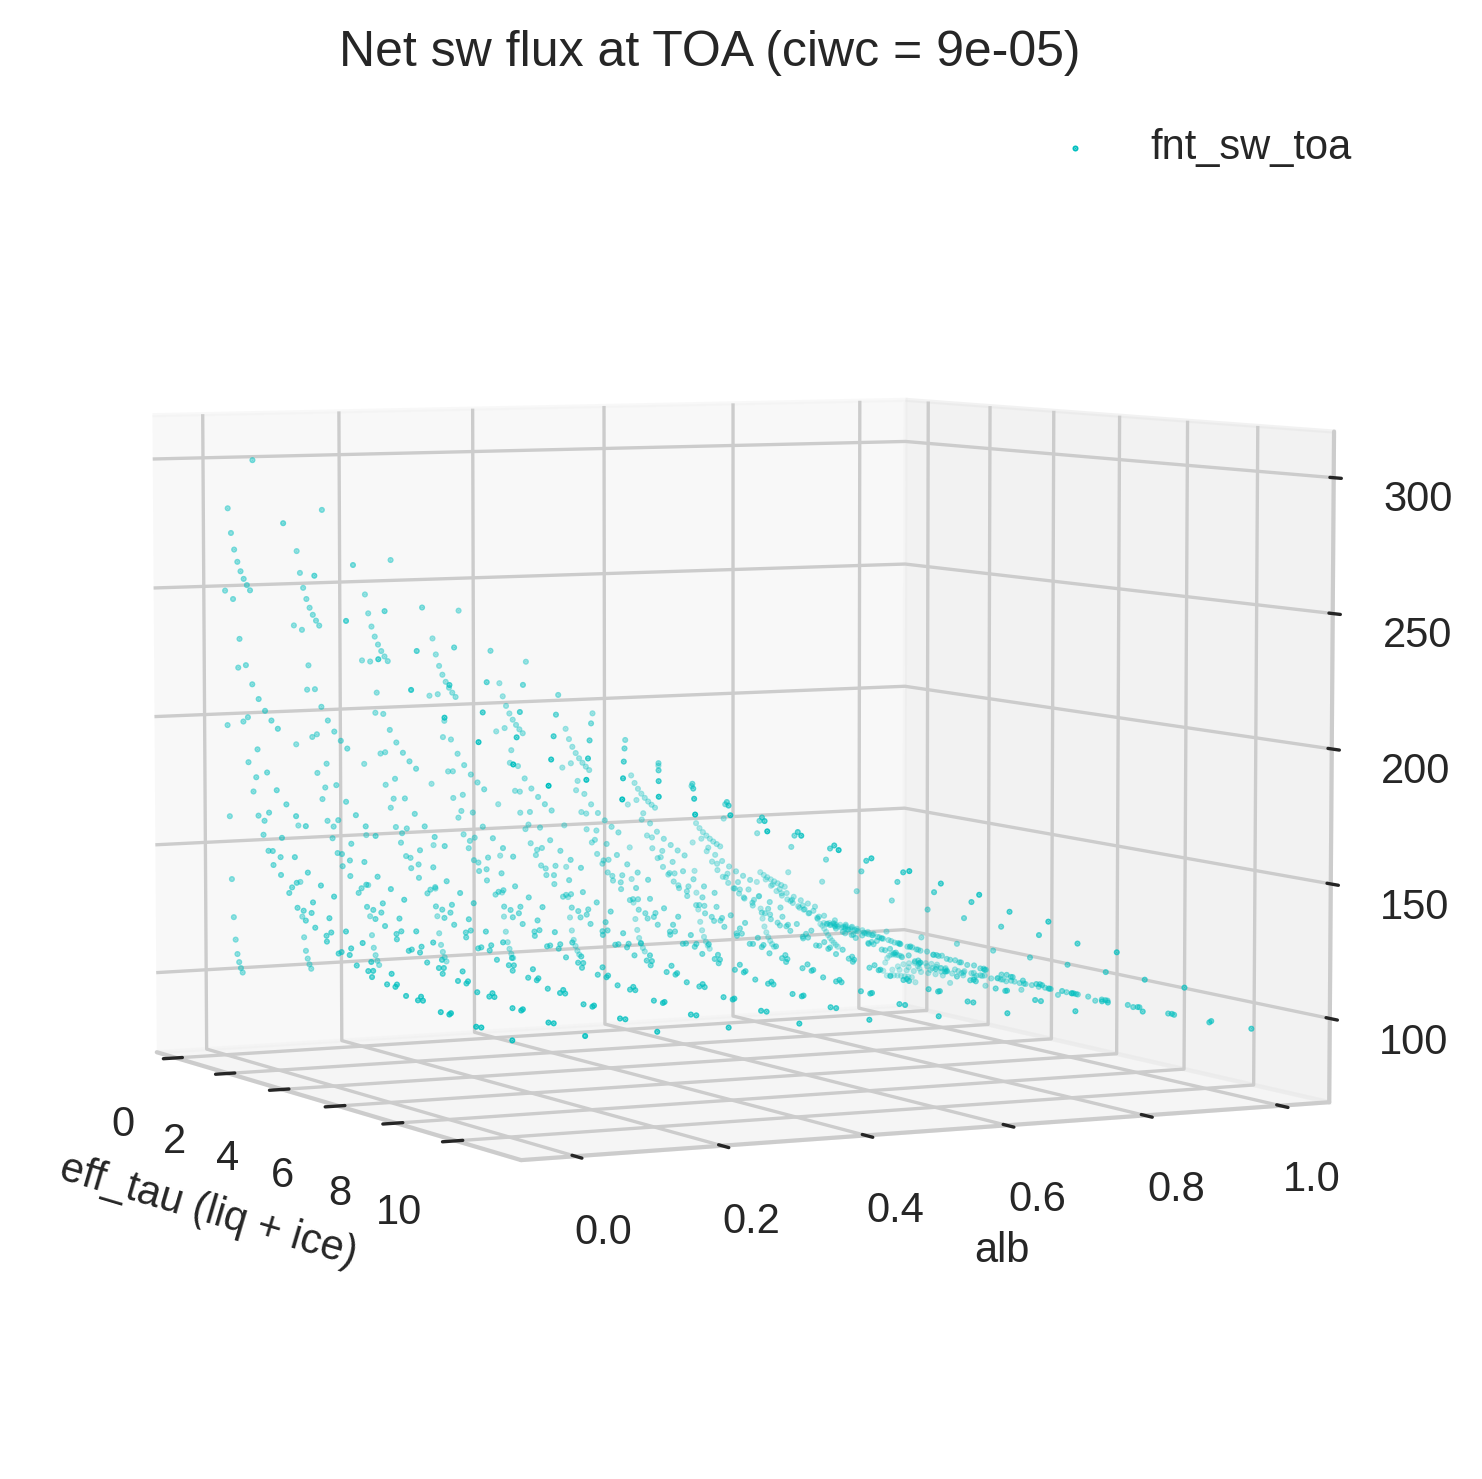

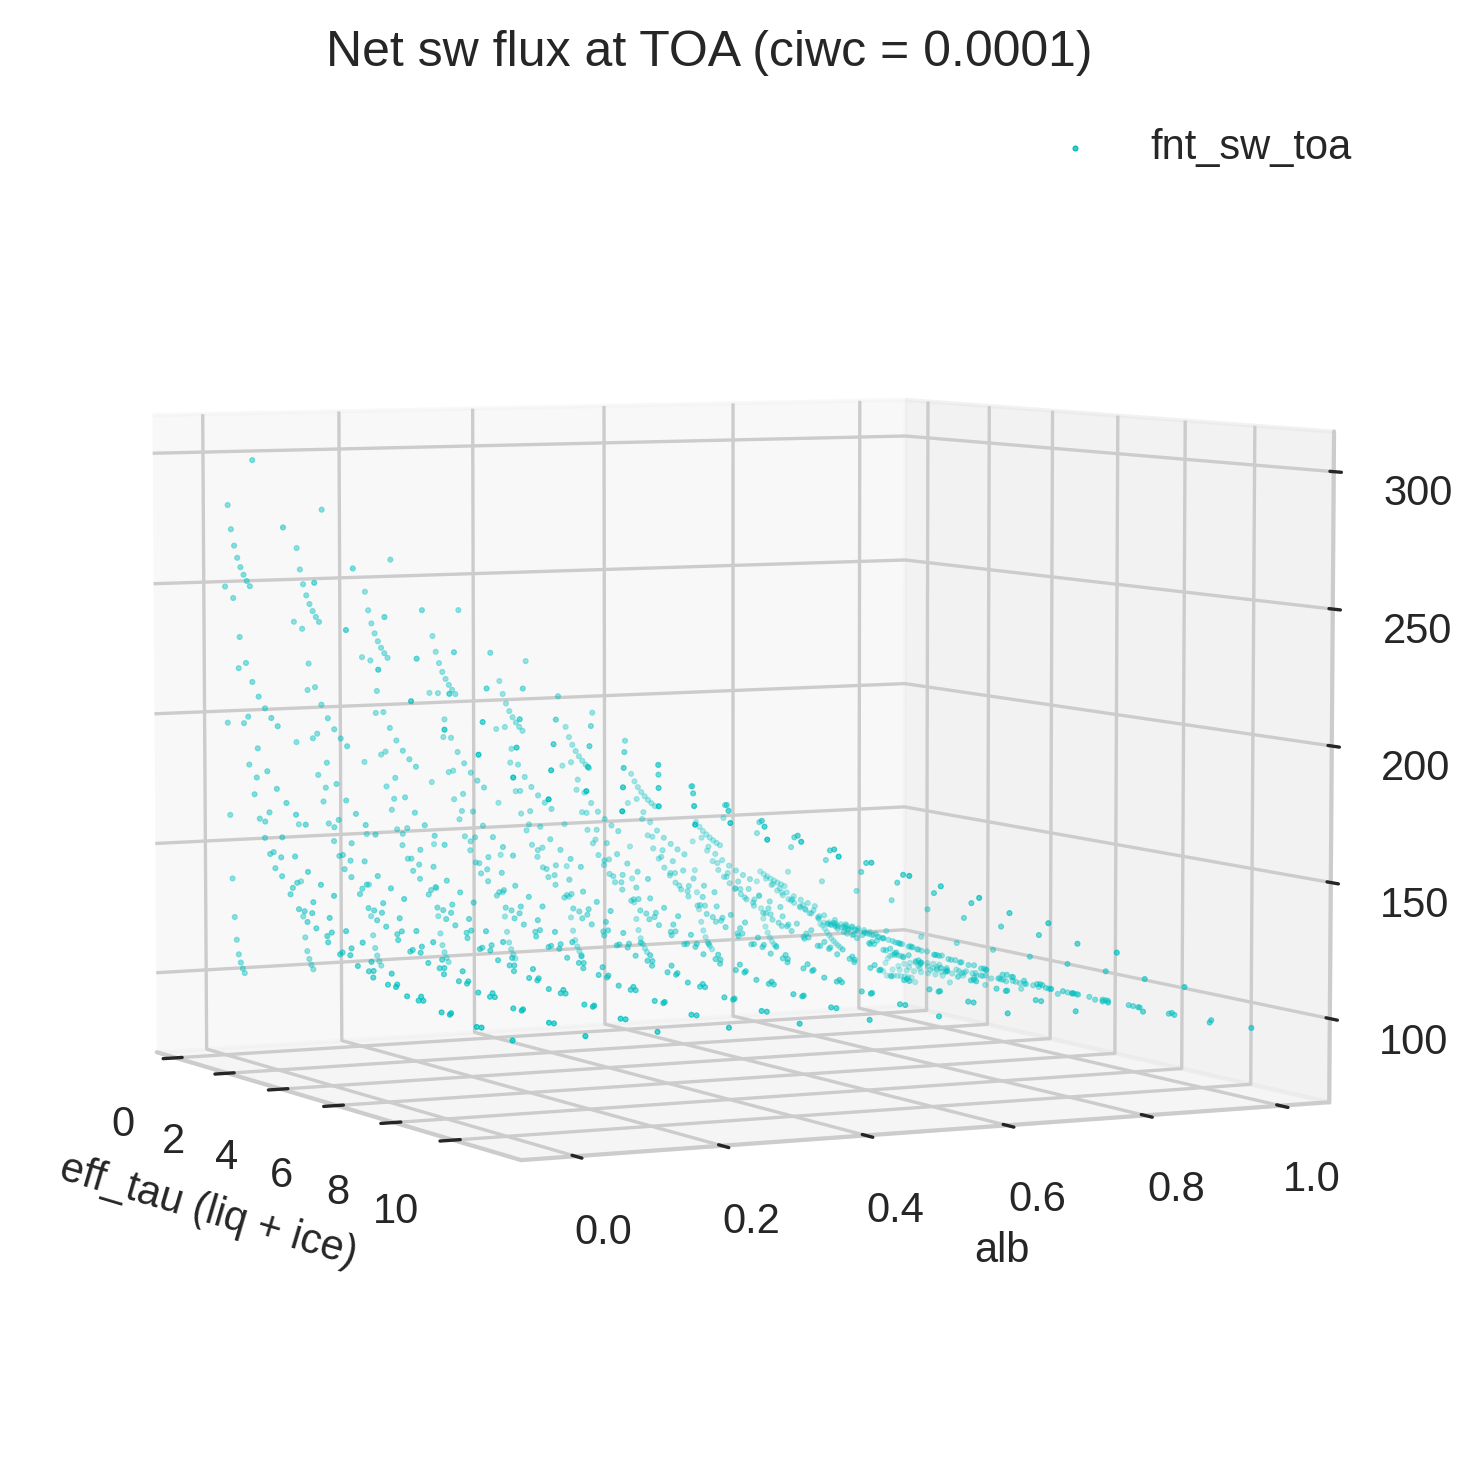

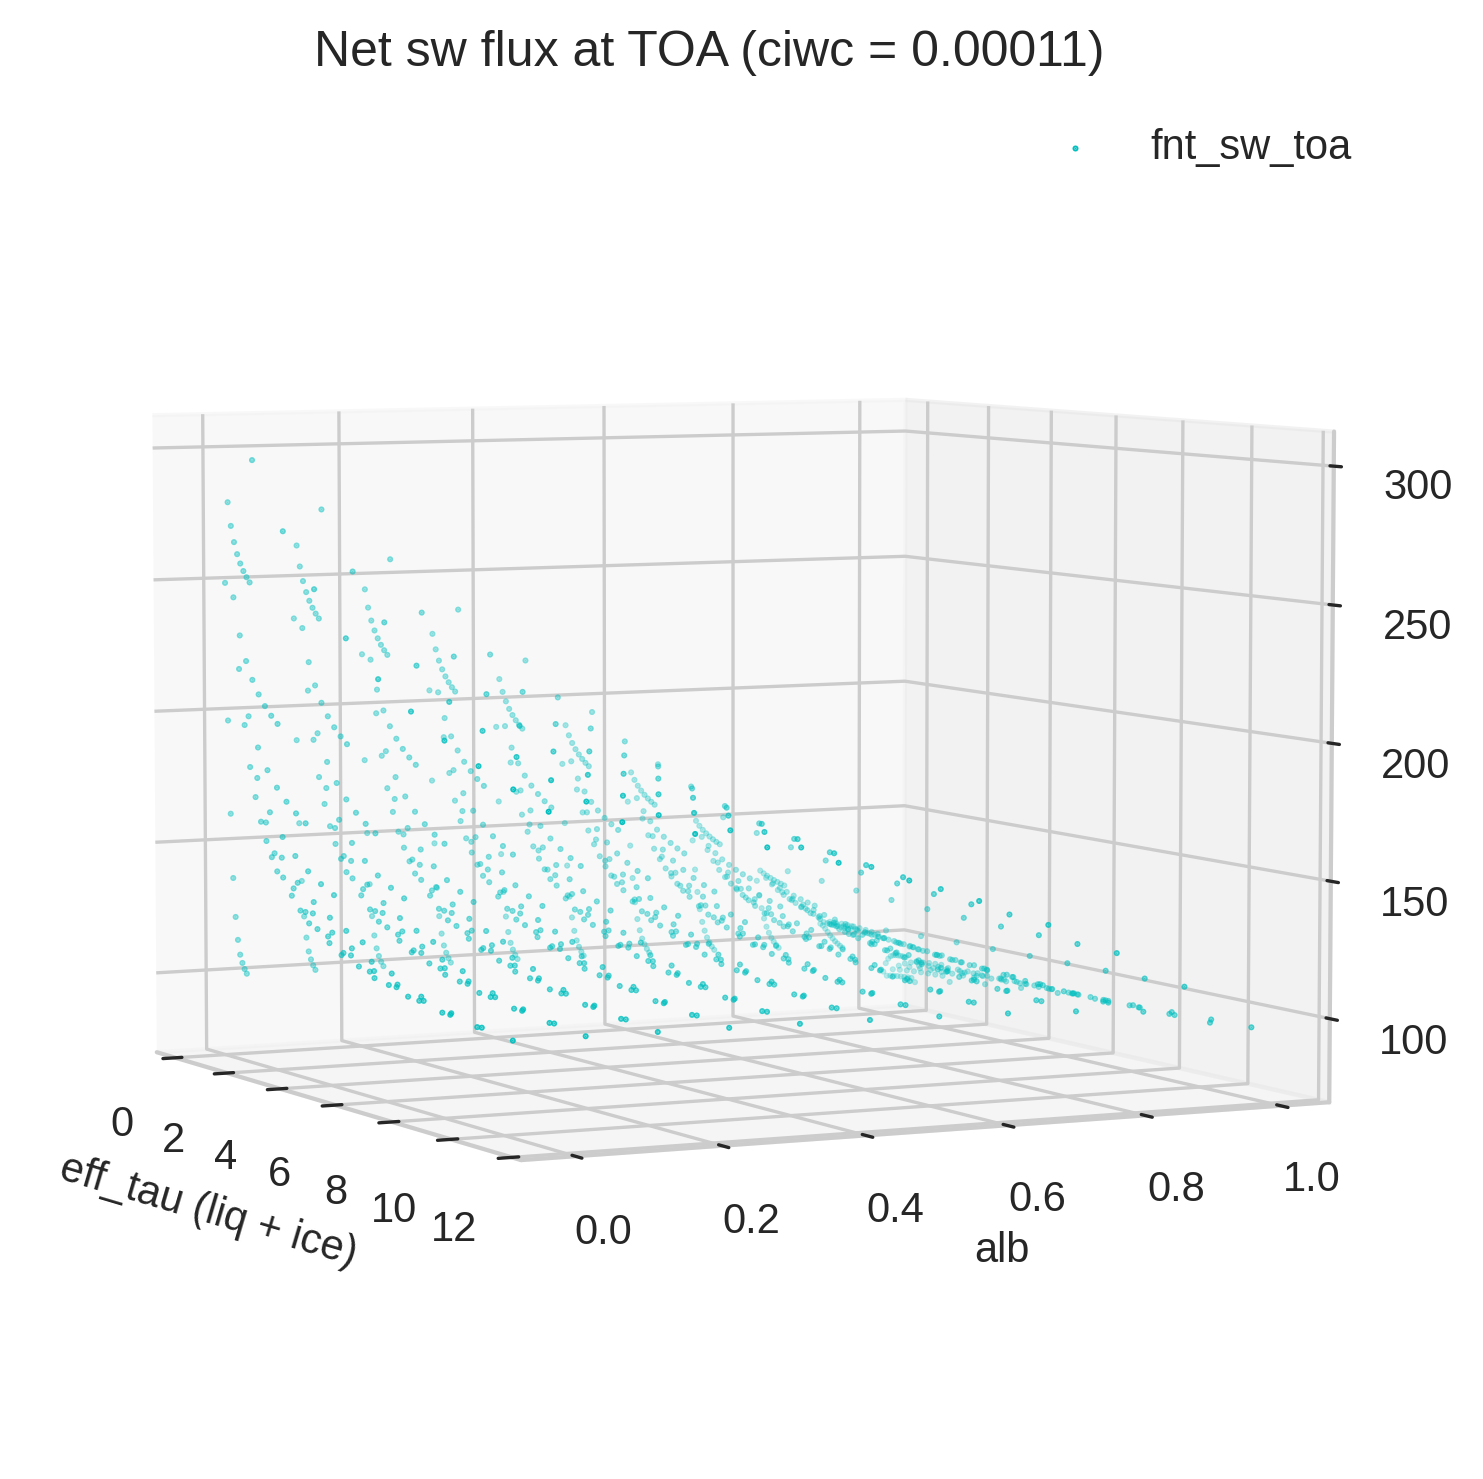

In [91]:
for ii in cciwc:
    
    mask = prtrbd_fluxes['ciwc'] == ii

    plt.figure(figsize=(6,6),dpi=300)

    ax = plt.axes(projection='3d')
    ax.scatter3D(prtrbd_fluxes.eff_tau_ice[mask] + prtrbd_fluxes.eff_tau_liq[mask],prtrbd_fluxes.albedo[mask],
                 prtrbd_fluxes.fnt_sw_toa[mask],label='fnt_sw_toa',s=0.2, color = 'c')
    #ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

    plt.legend(loc='upper right')
    plt.title('Net sw flux at TOA (ciwc = ' +str(np.round(ii,5))+')')
    plt.xlabel('eff_tau (liq + ice)')
    plt.ylabel('alb')

    ax.view_init(5, 333) #333
    
    folder= 'ciwc_values_UpdatedIceFrac'
    filename = 'ciwc'+str(ii)
    
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    plt.savefig('{}/{}.png'.format(folder, filename), dpi=300) 

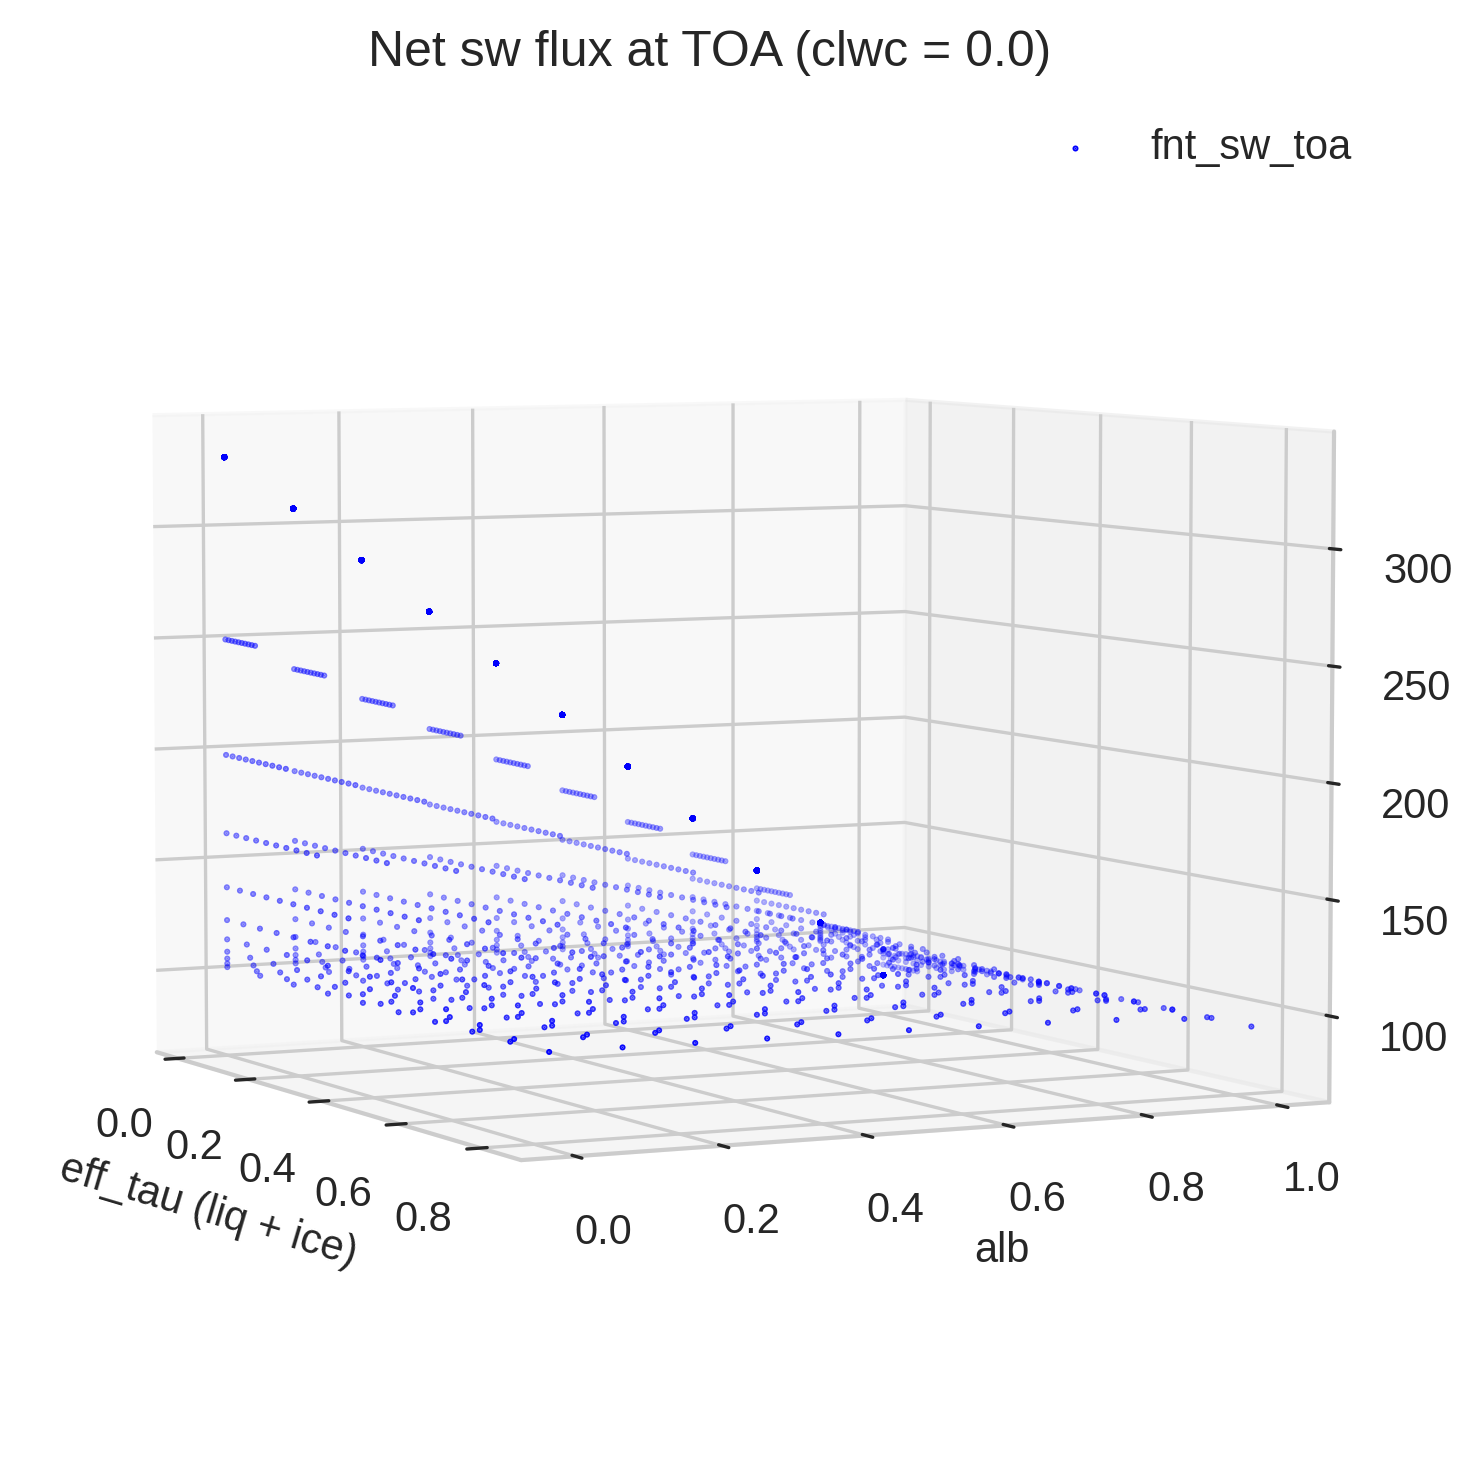

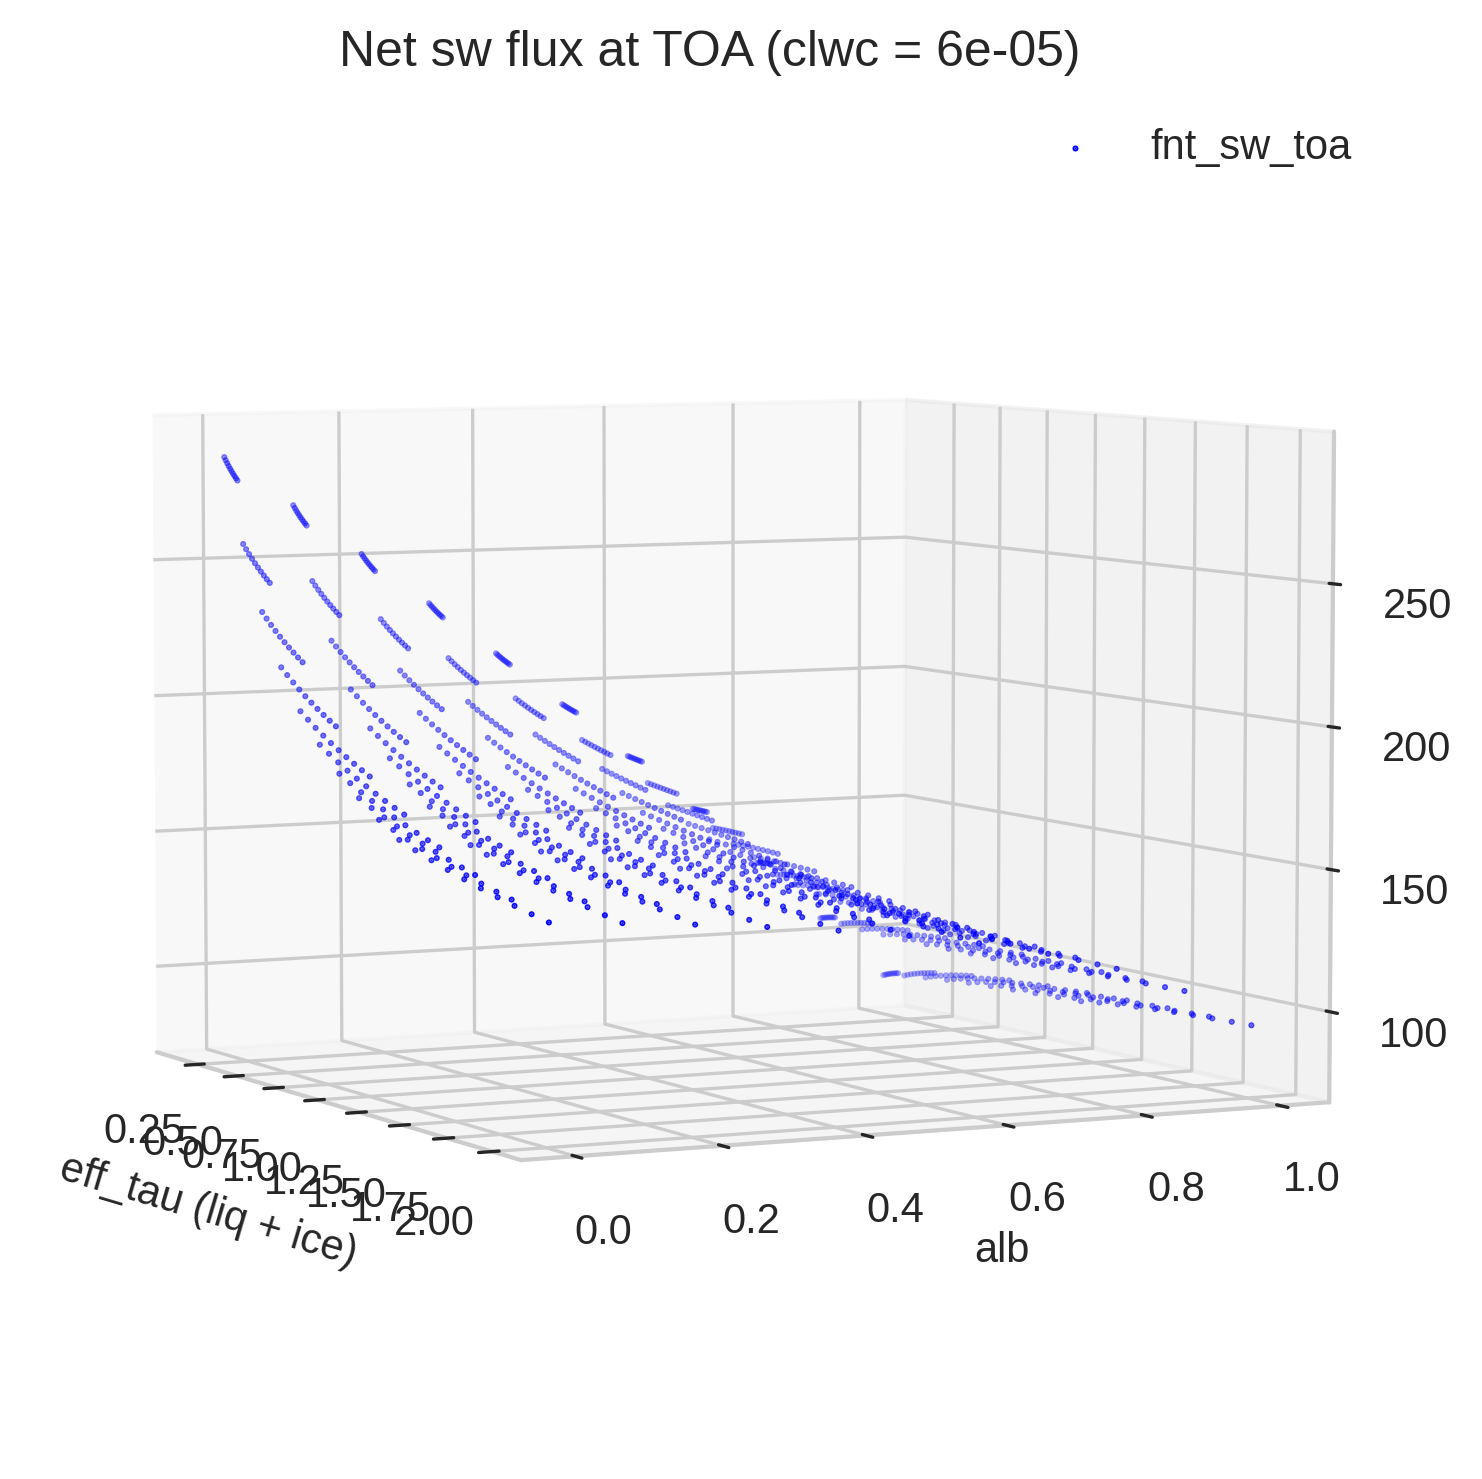

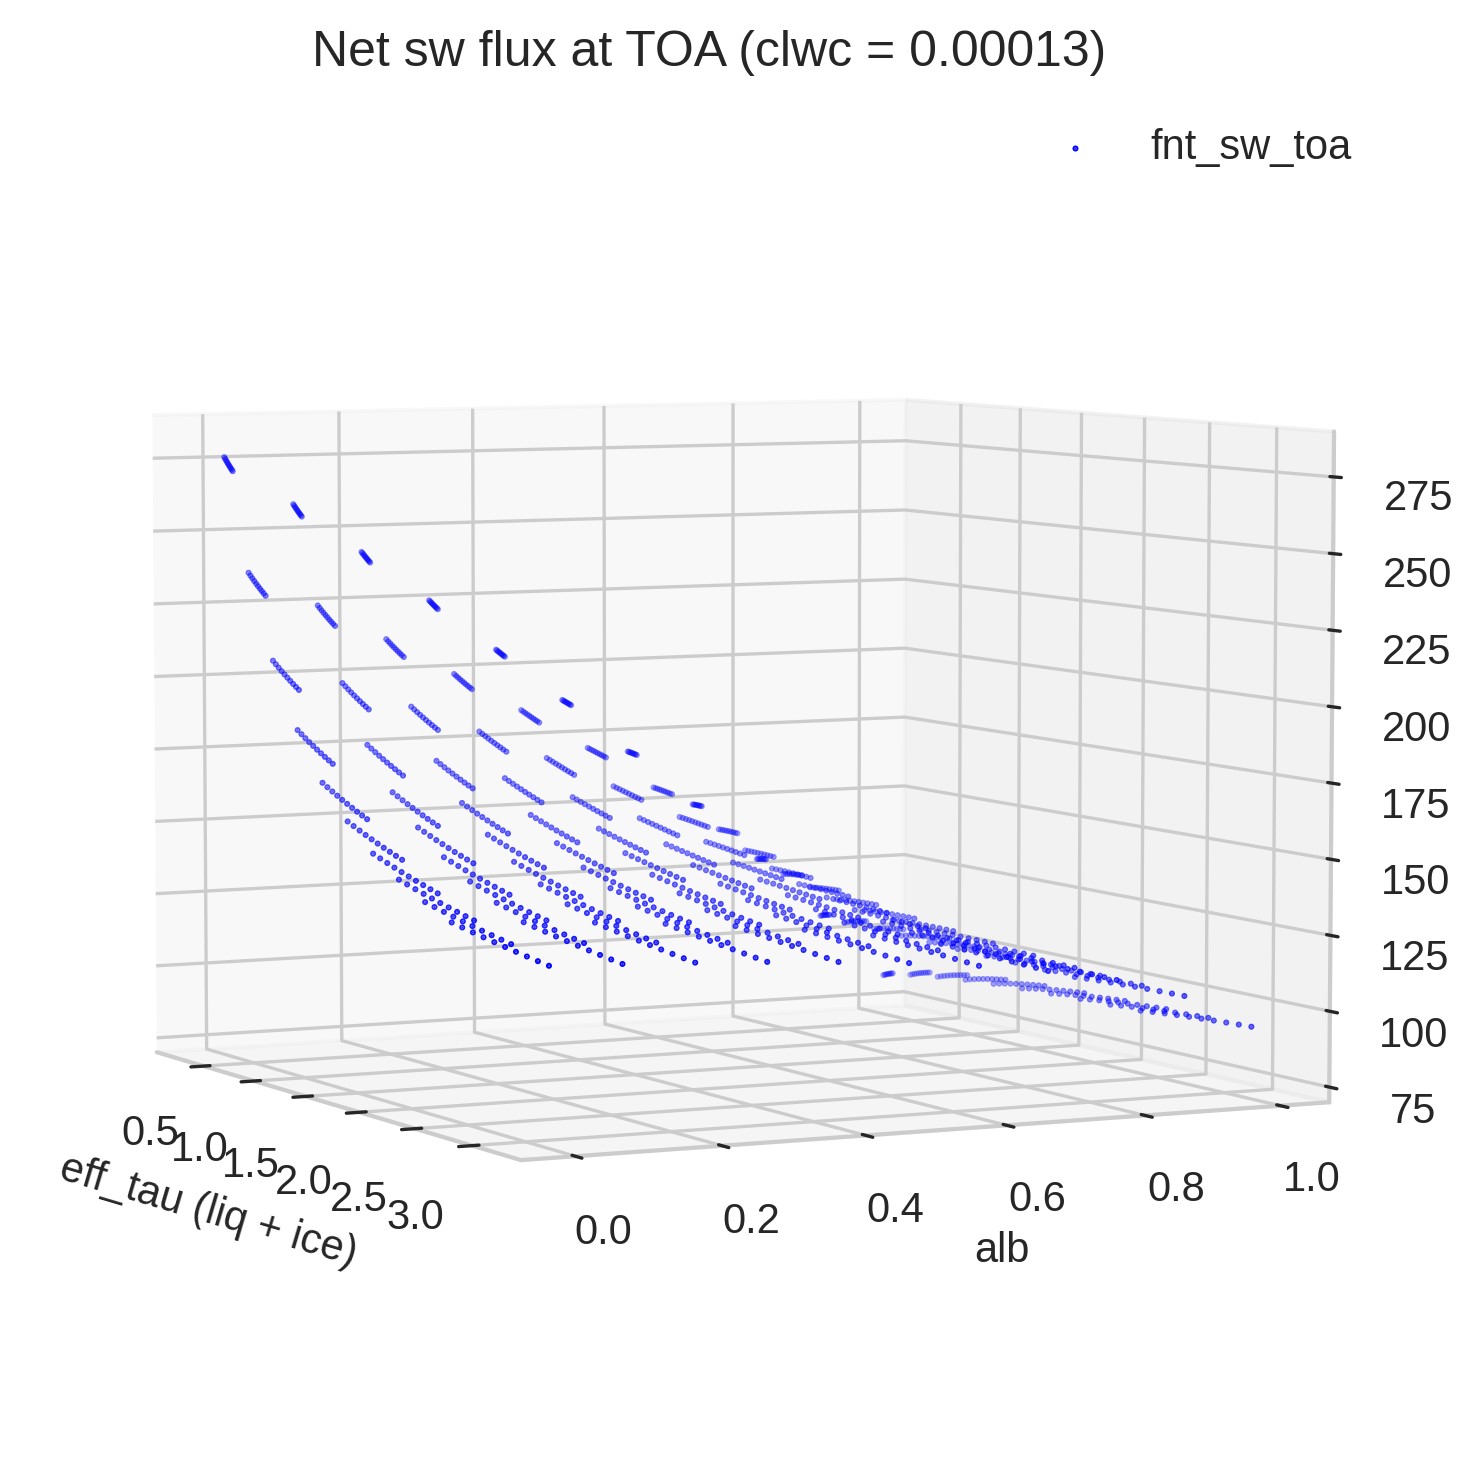

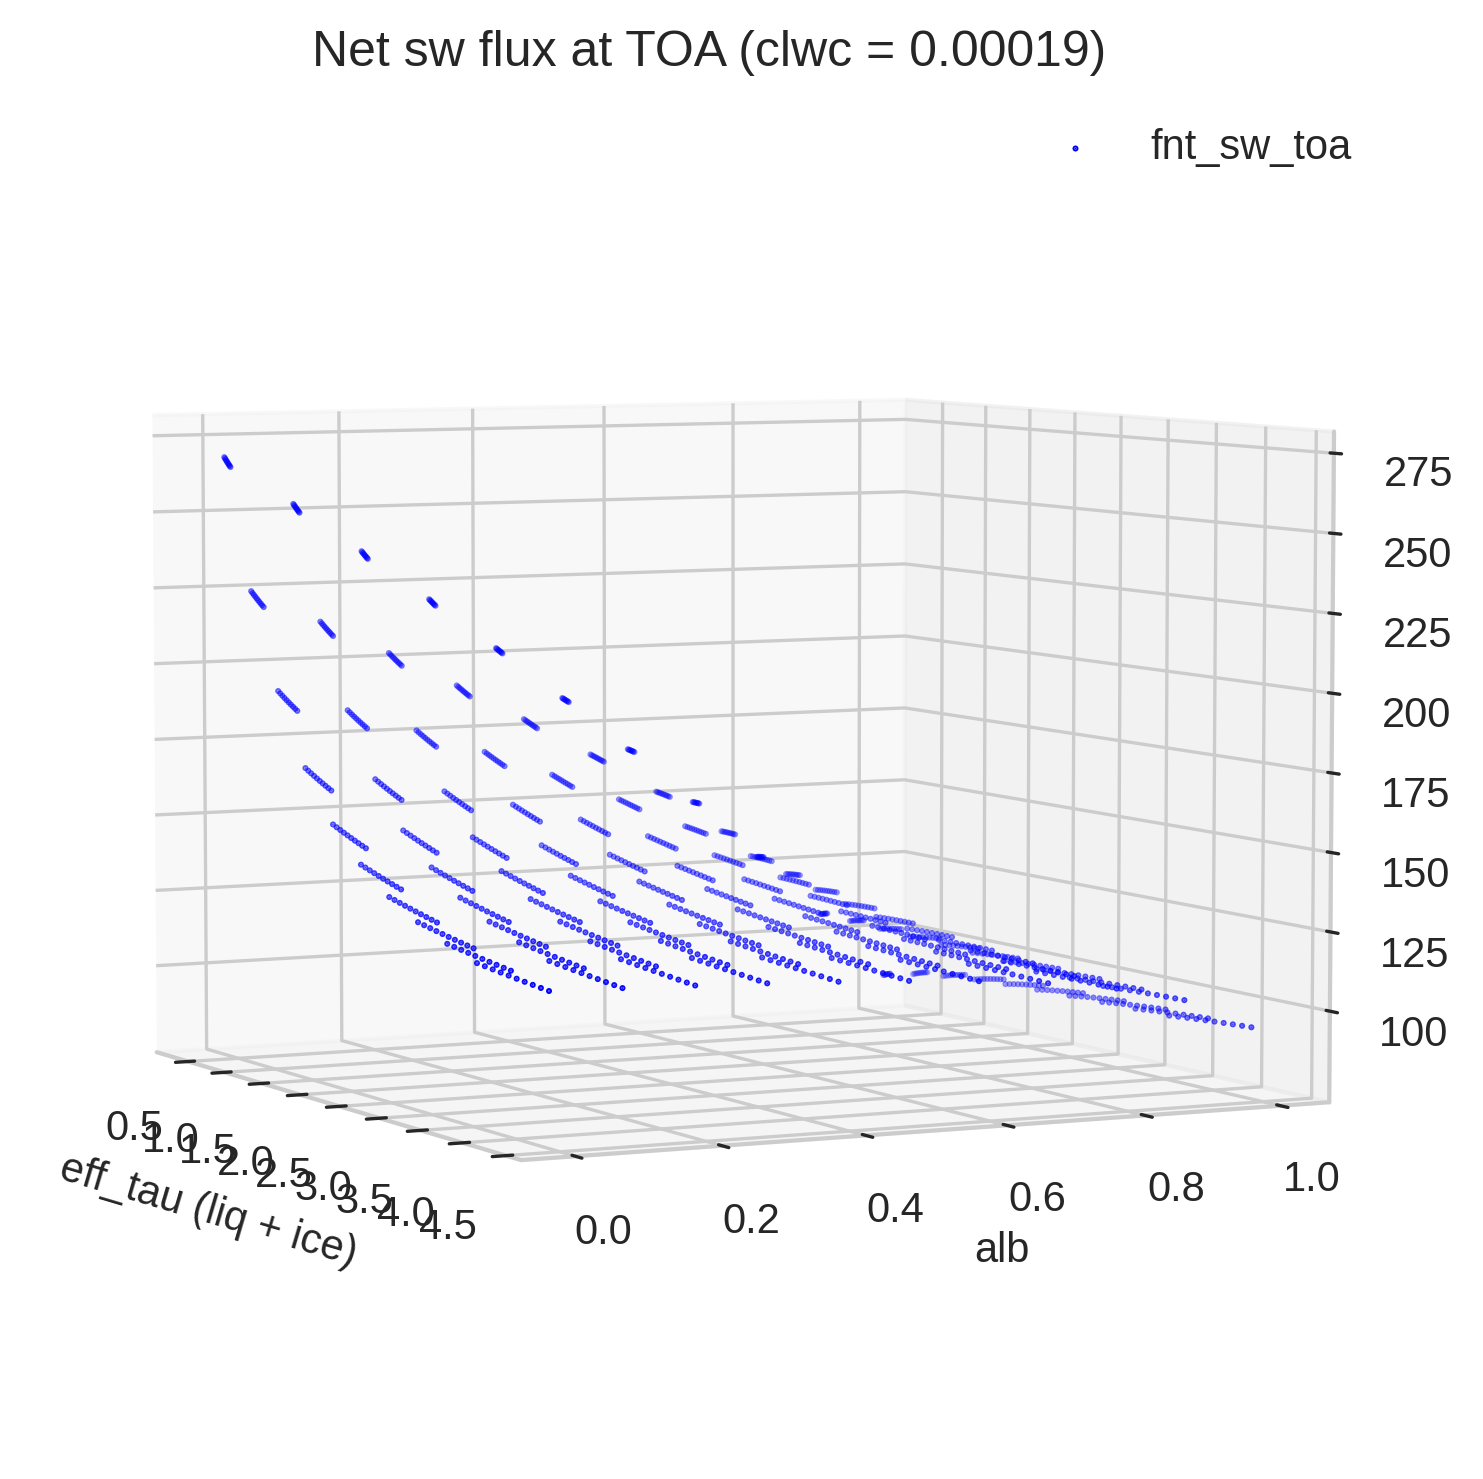

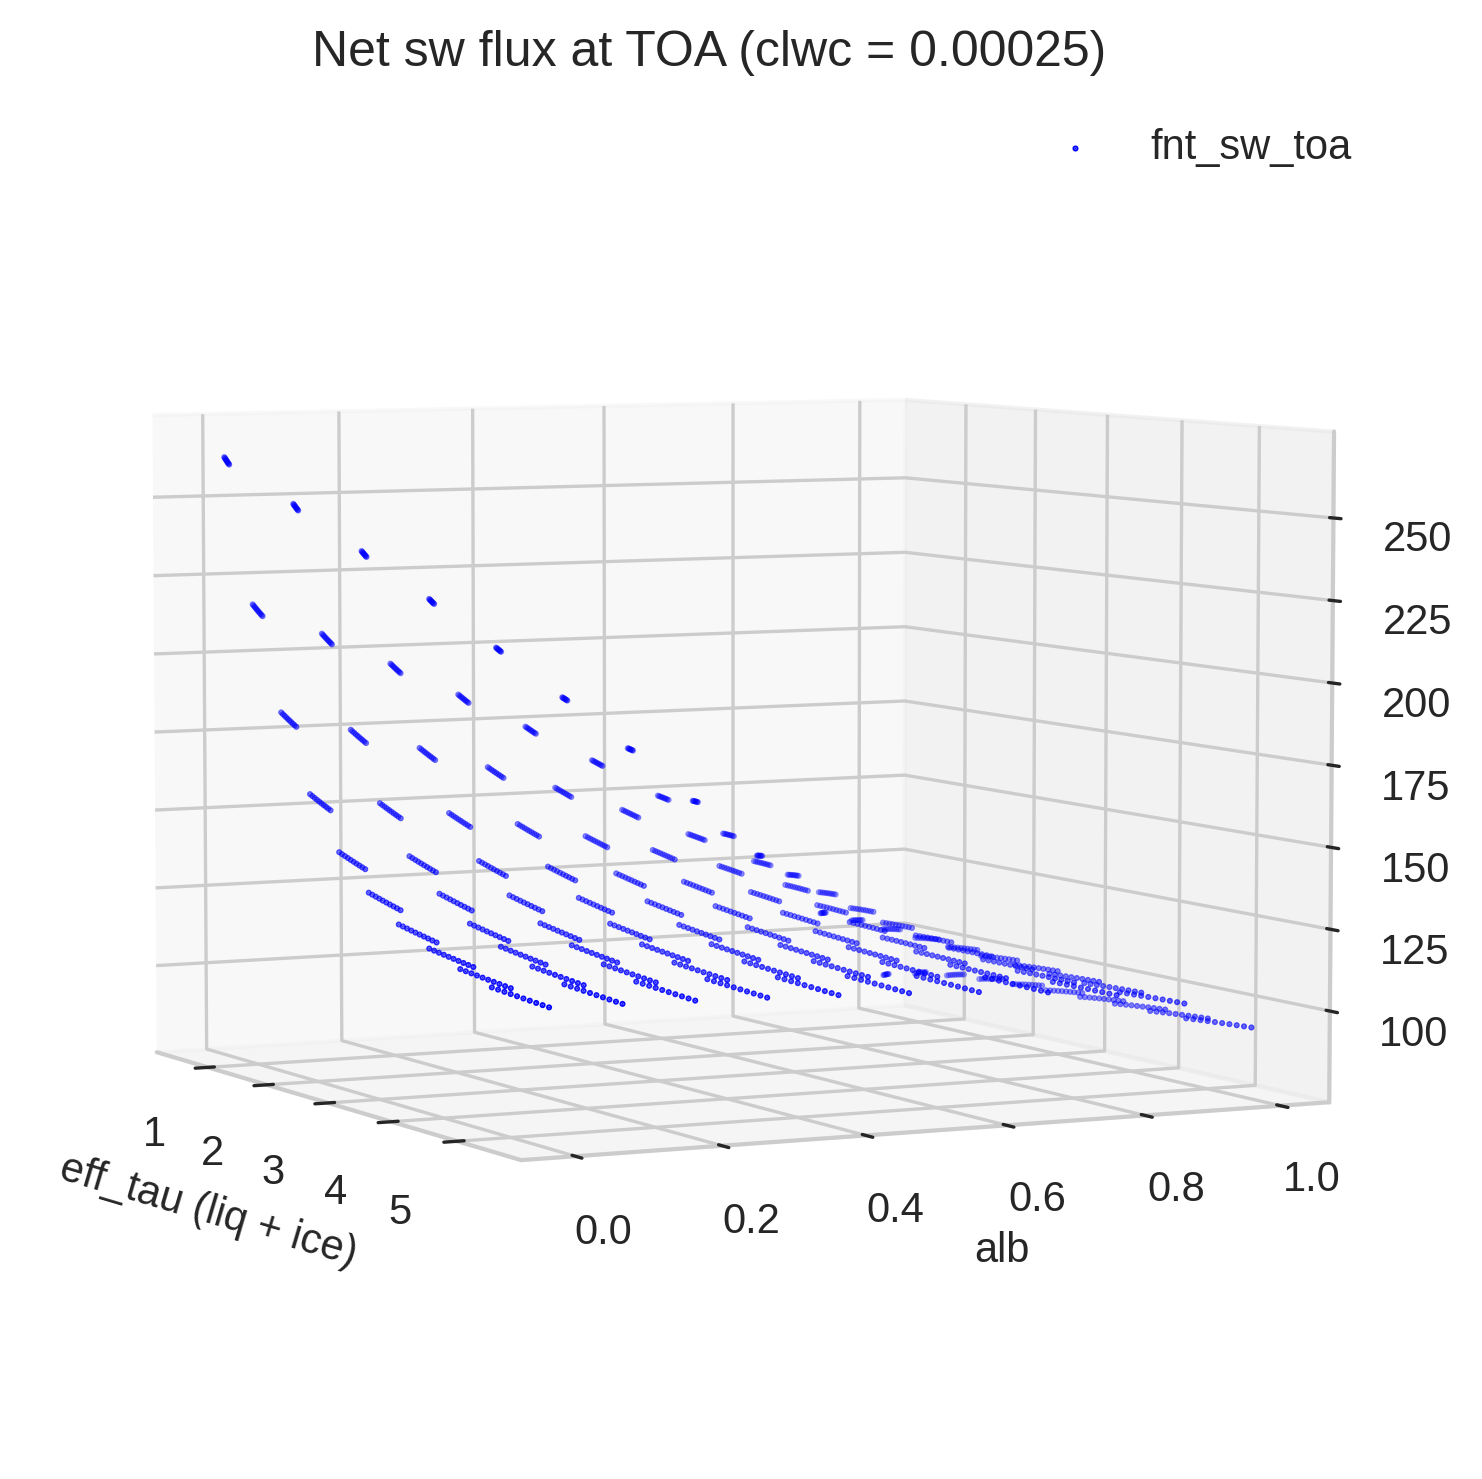

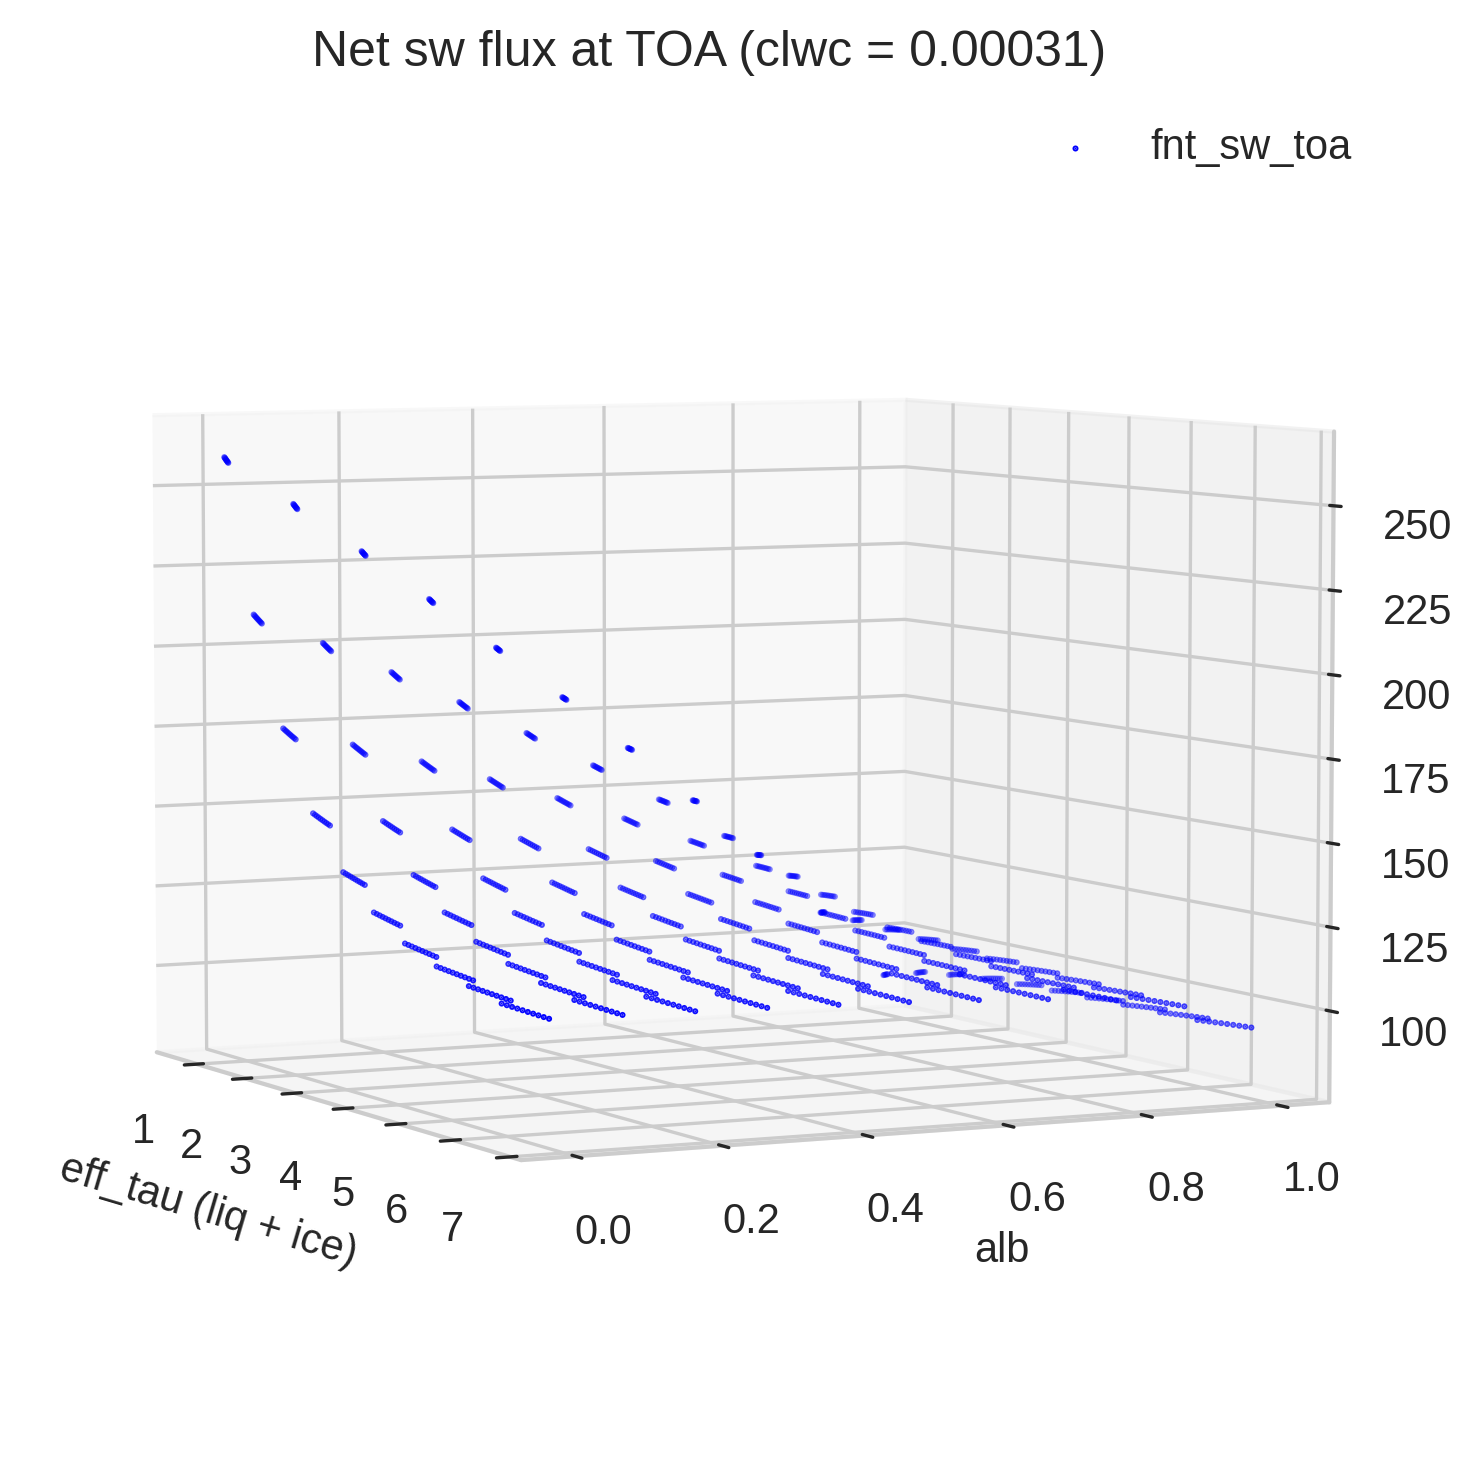

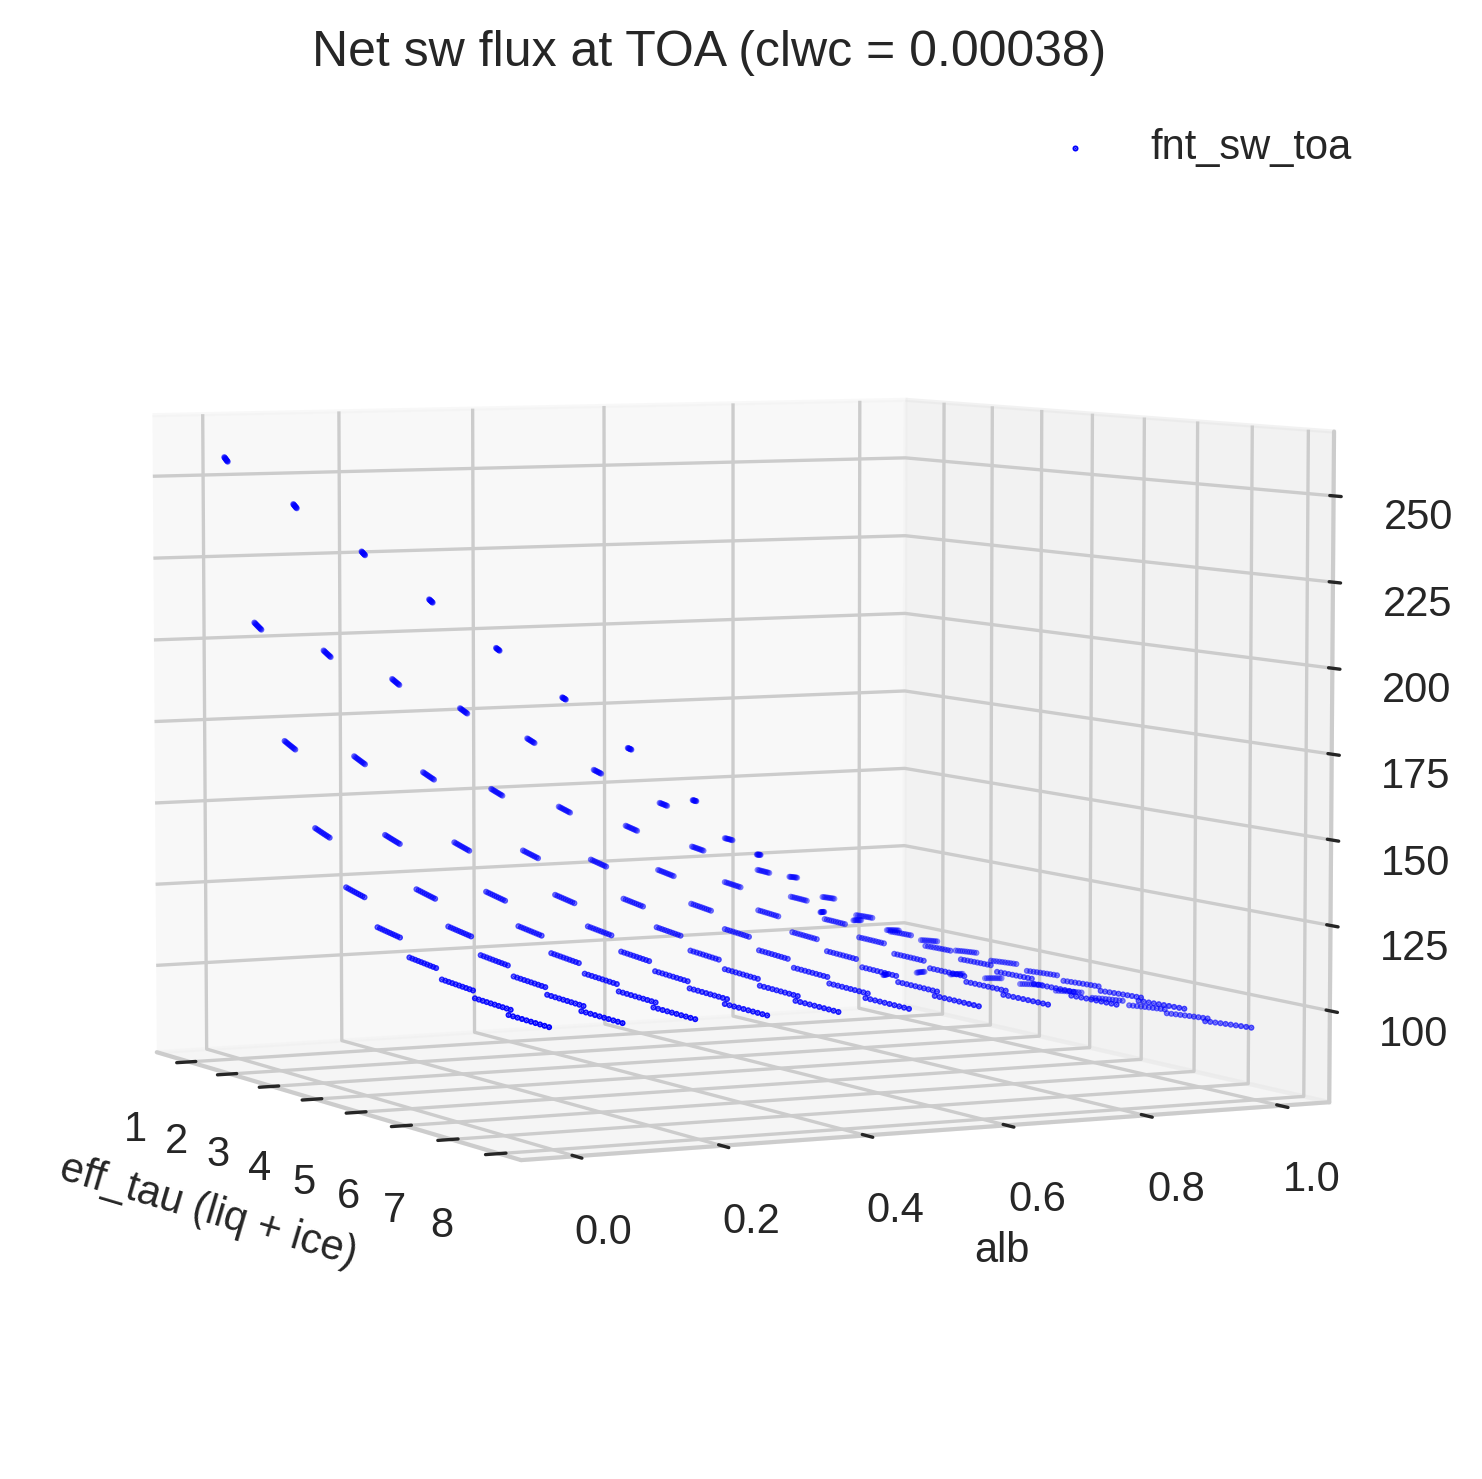

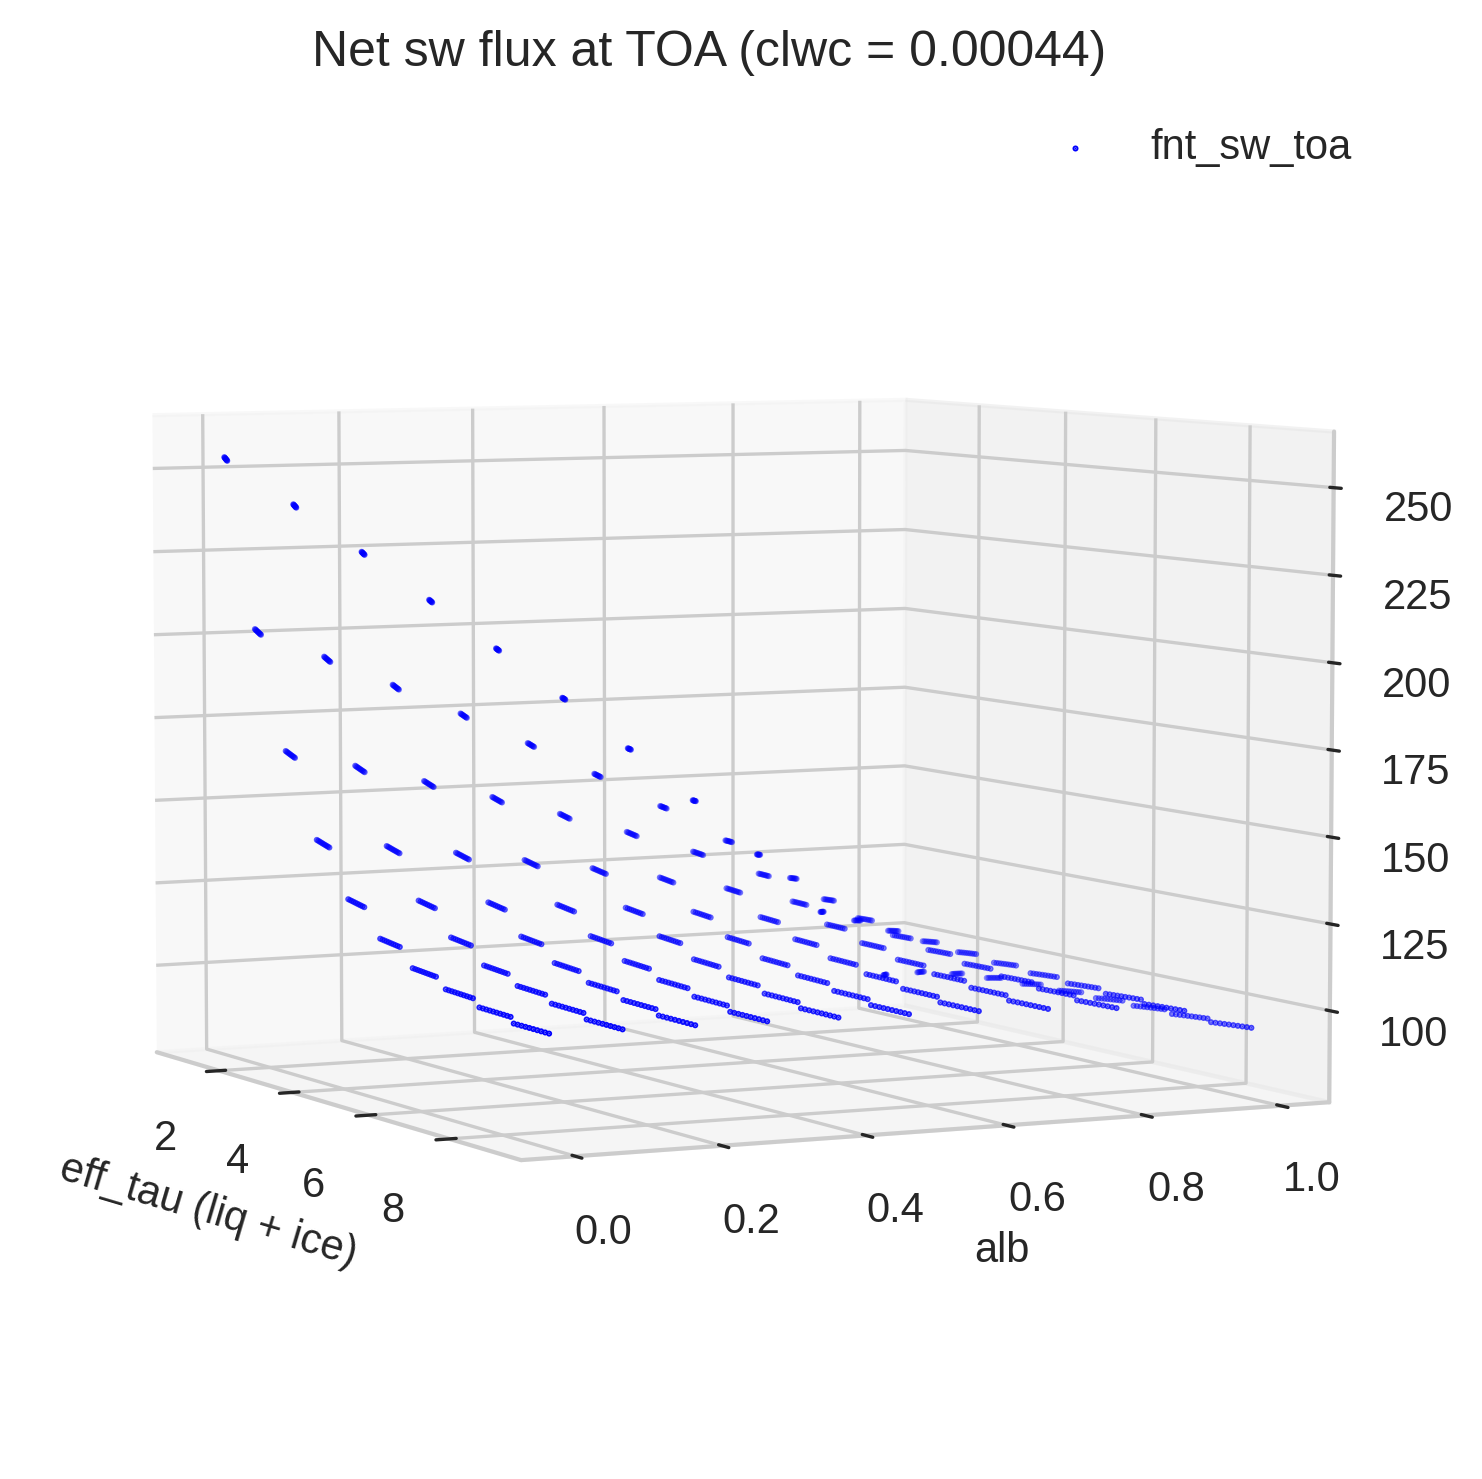

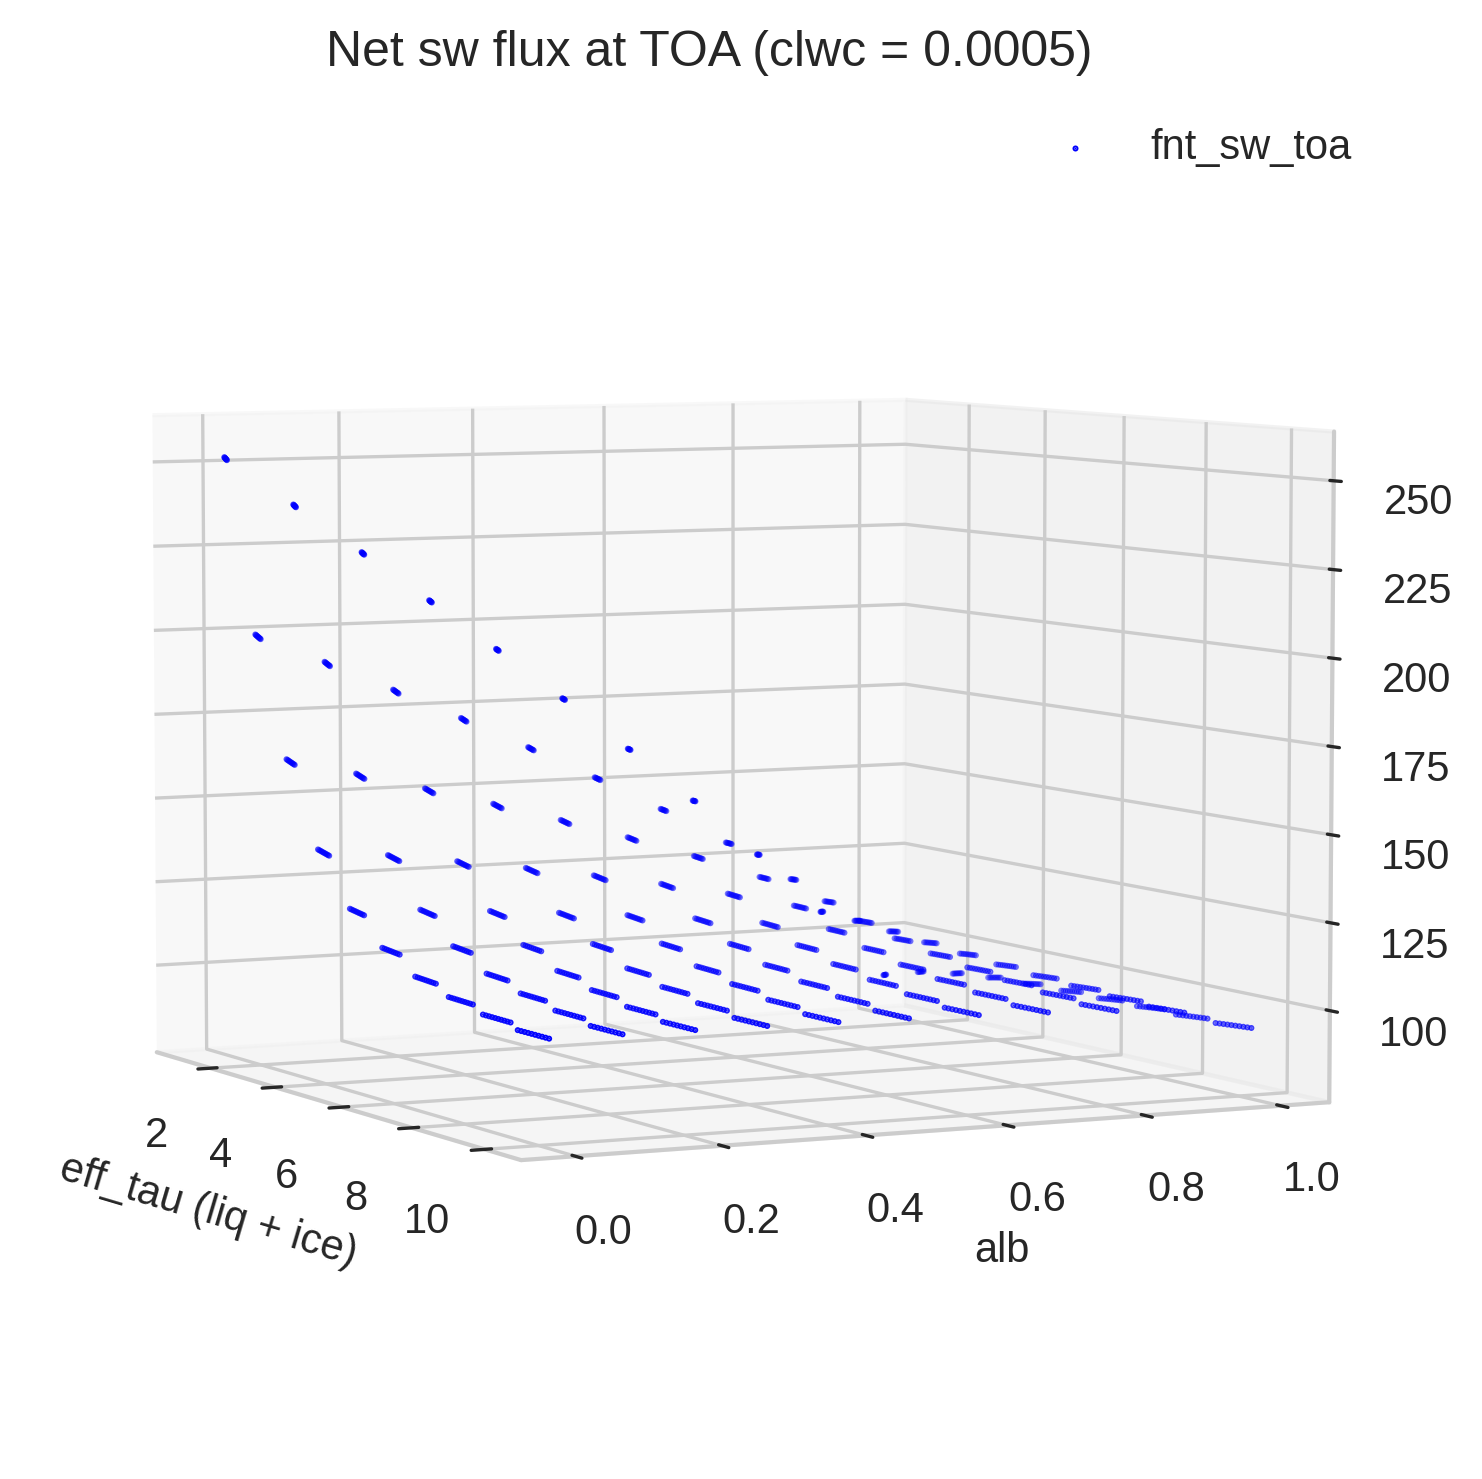

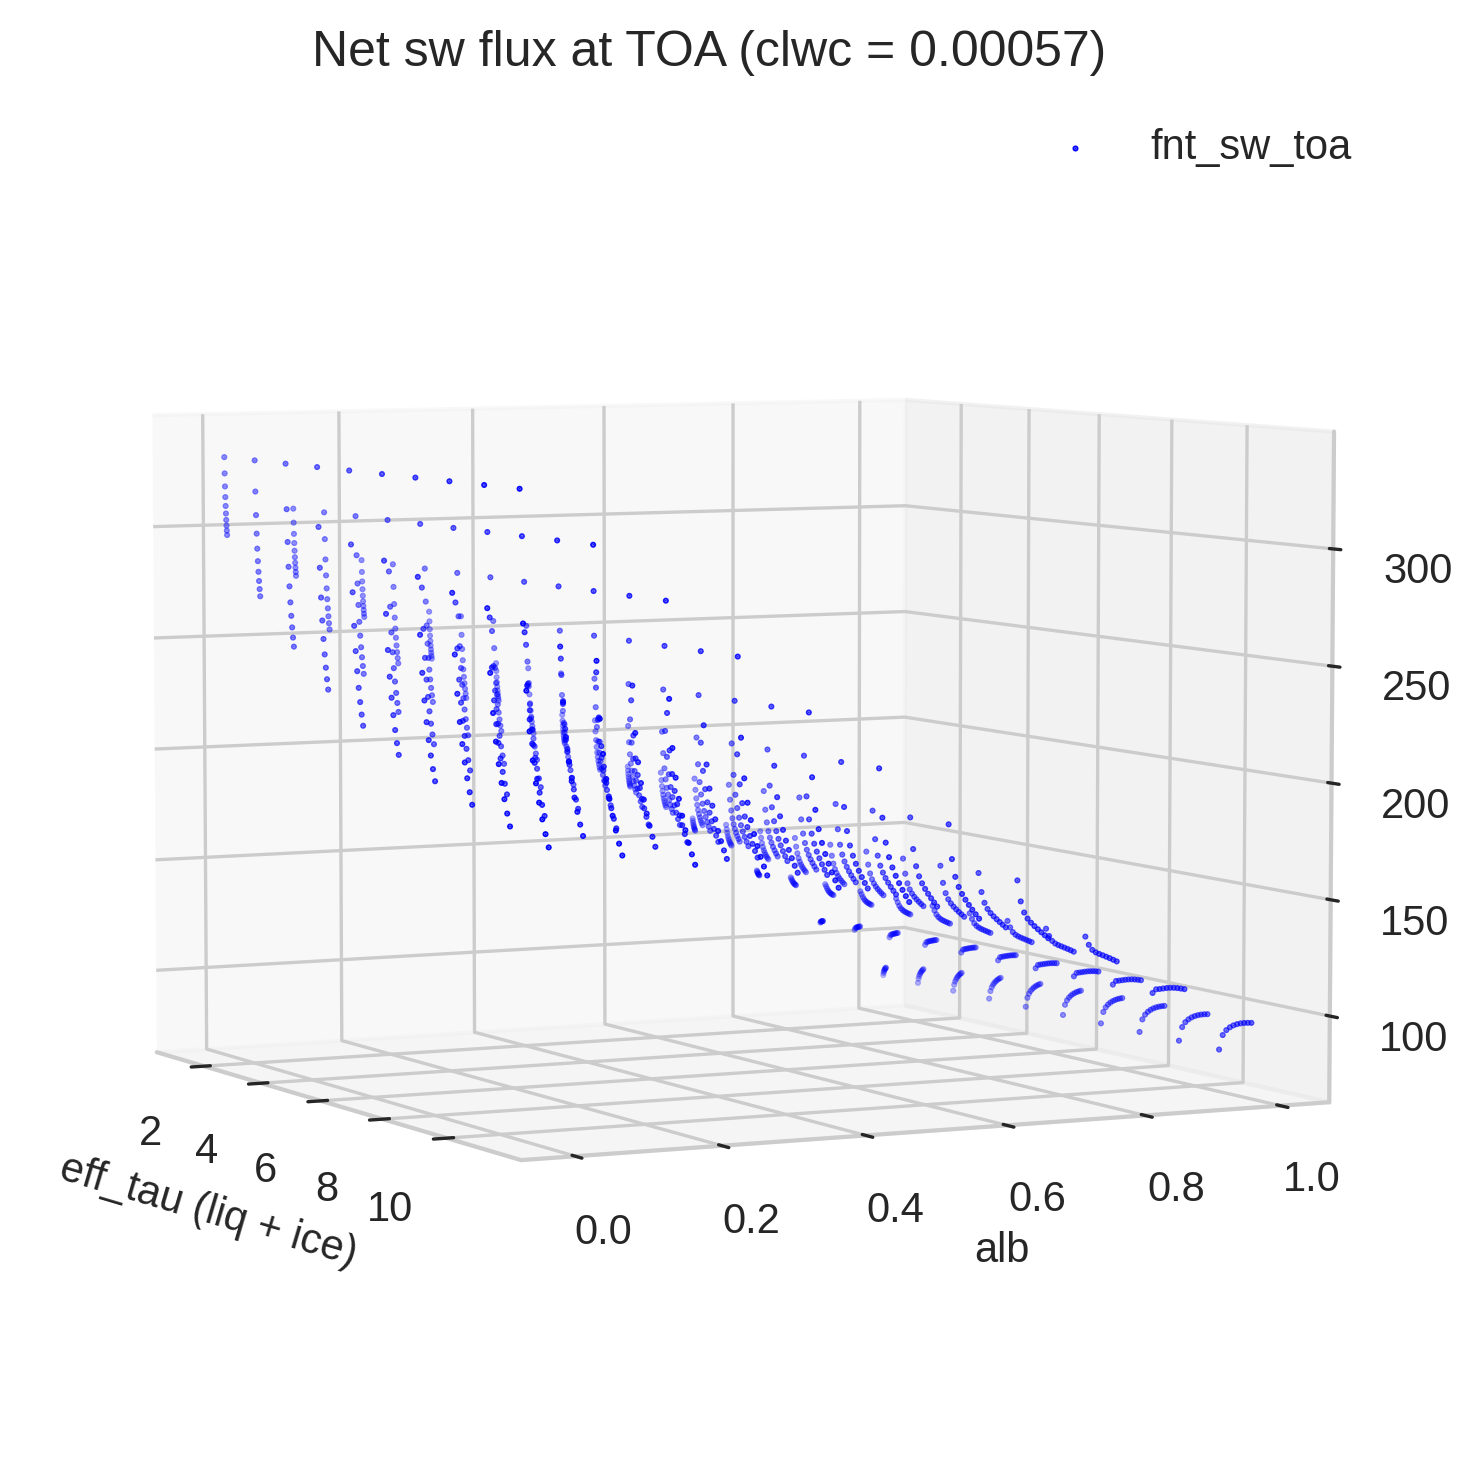

In [92]:
for ii in cclwc:
    
    mask = prtrbd_fluxes['clwc'] == ii

    plt.figure(figsize=(6,6),dpi=300)

    ax = plt.axes(projection='3d')
    ax.scatter3D(prtrbd_fluxes.eff_tau_ice[mask] + prtrbd_fluxes.eff_tau_liq[mask],prtrbd_fluxes.albedo[mask],
                 prtrbd_fluxes.fnt_sw_toa[mask],label='fnt_sw_toa',s=0.2, color = 'b')
    #ax.scatter3D(I,II,prdctnss,label='predictions with the NN',s=0.1)

    plt.legend(loc='upper right')
    plt.title('Net sw flux at TOA (clwc = ' +str(np.round(ii,5))+')')
    plt.xlabel('eff_tau (liq + ice)')
    plt.ylabel('alb')

    ax.view_init(5, 333) #333
    
    folder= 'clwc_values_UpdatedIceFrac'
    filename = 'clwc'+str(ii)
    
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    plt.savefig('{}/{}.png'.format(folder, filename), dpi=300) 

#### Analyzing degeneracy

In [93]:
#find duplicate rows across specific columns
duplicateRows = prtrbd_fluxes[prtrbd_fluxes.duplicated(['fnt_sw_toa'], keep = False)]

In [94]:
len(duplicateRows)

1226

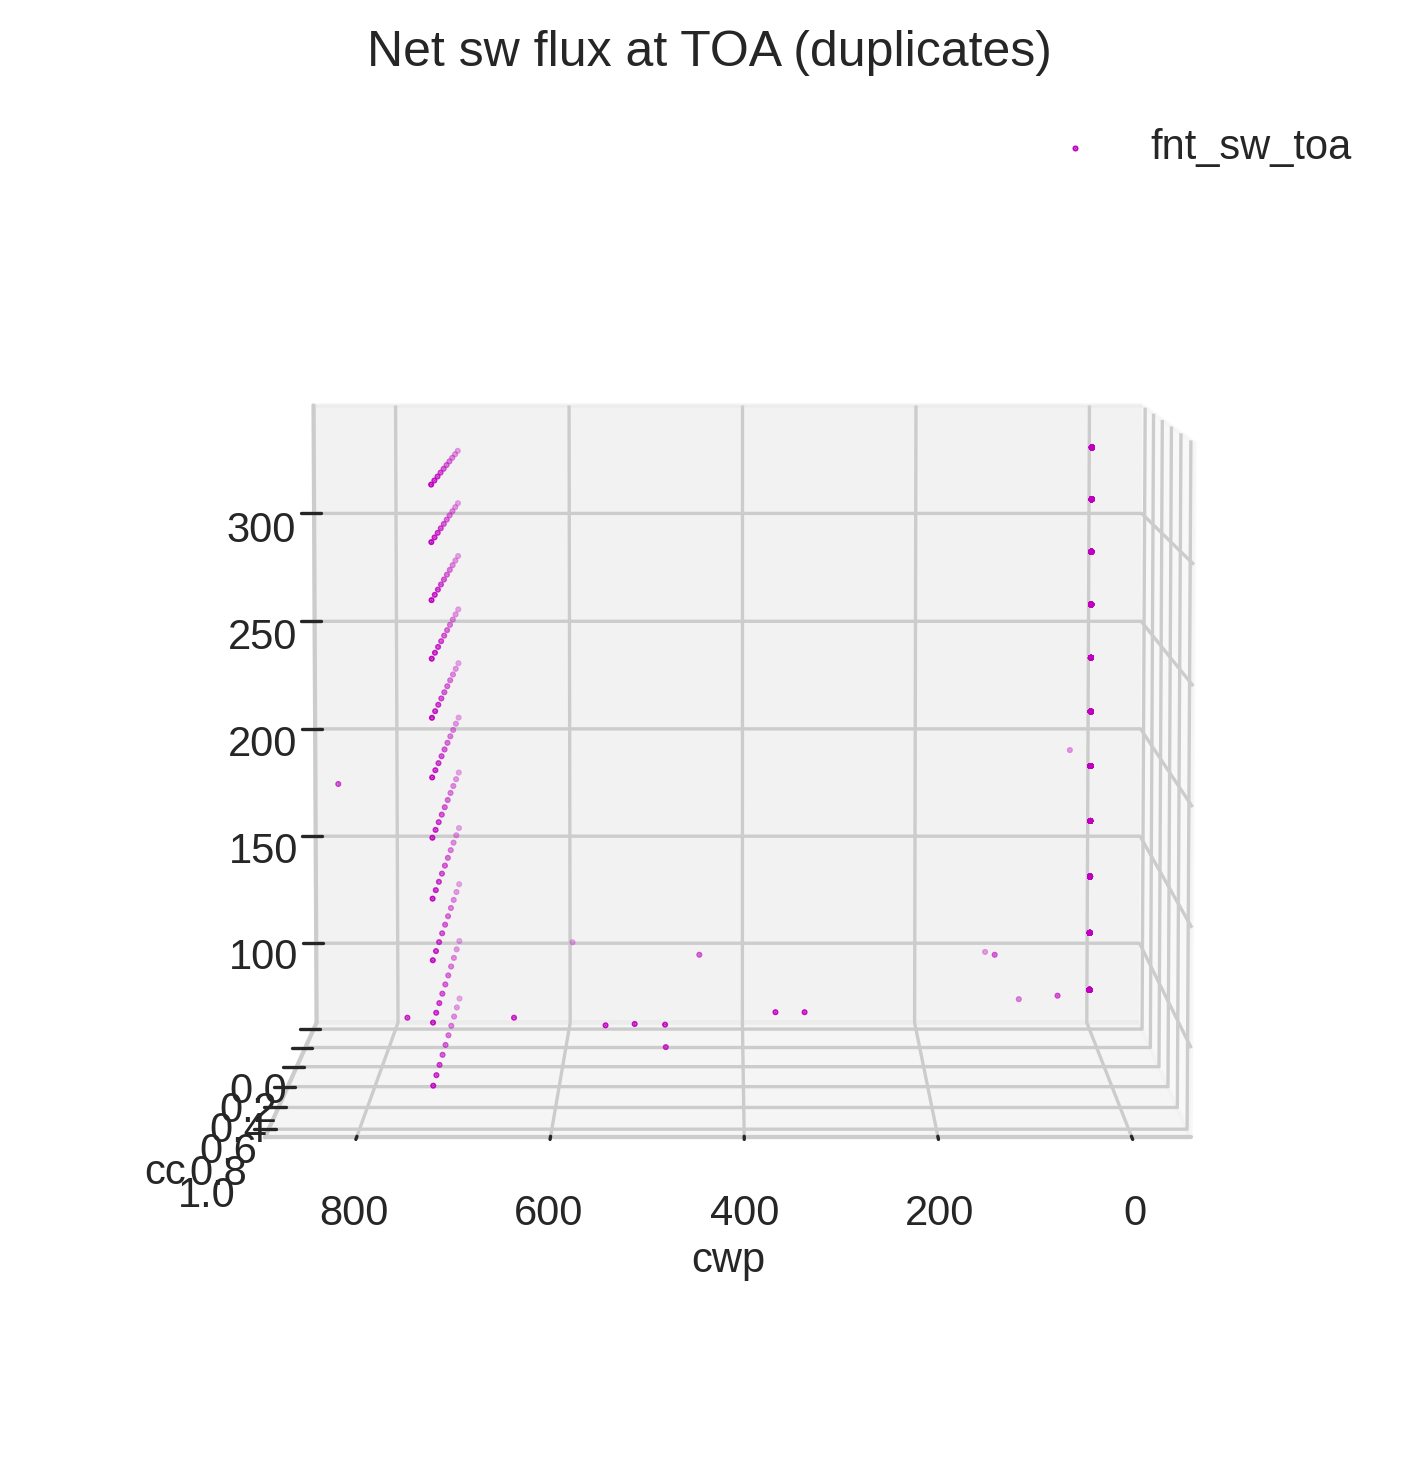

In [100]:
plt.figure(figsize=(6,6),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(duplicateRows.cwp,duplicateRows.cc,
            duplicateRows.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'm')
plt.legend(loc='upper right')
plt.title('Net sw flux at TOA (duplicates)')
plt.xlabel('cwp')
plt.ylabel('cc')

ax.view_init(5, 90) #333

plt.show()

In [101]:
mask2 = duplicateRows.cwp== duplicateRows.loc[1018].cwp

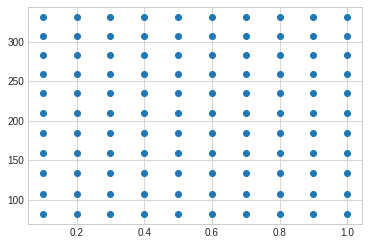

In [104]:
plt.figure()
plt.scatter(duplicateRows[mask2].cc, duplicateRows[mask2].fnt_sw_toa)

plt.show()

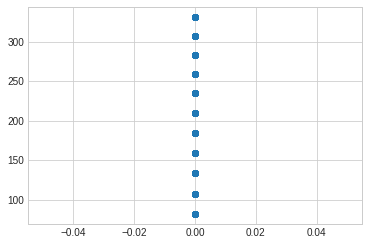

In [105]:
plt.figure()
plt.scatter(duplicateRows[mask2].ciwc, duplicateRows[mask2].fnt_sw_toa)

plt.show()

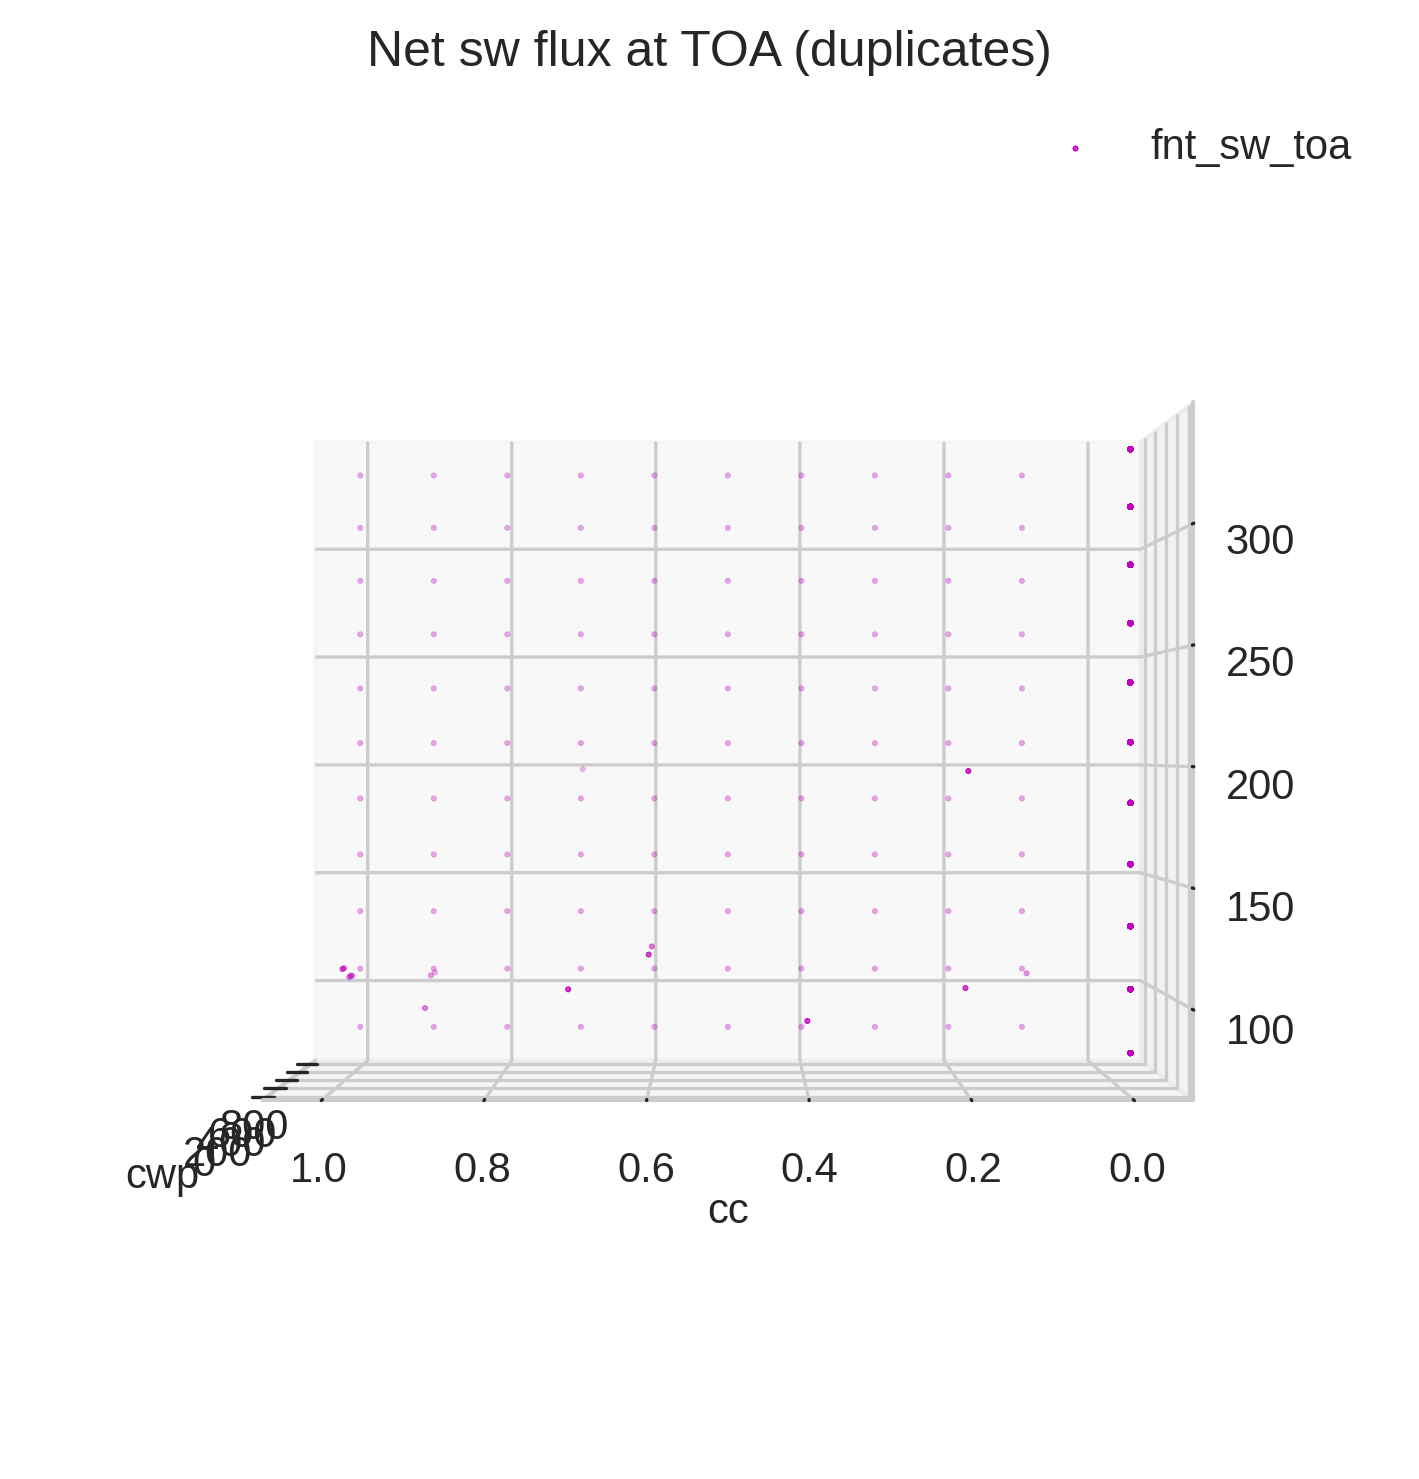

In [134]:
plt.figure(figsize=(6,6),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(duplicateRows.cwp,duplicateRows.cc,
            duplicateRows.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'm')
plt.legend(loc='upper right')
plt.title('Net sw flux at TOA (duplicates)')
plt.xlabel('cwp')
plt.ylabel('cc')

ax.view_init(0, 180) #333

plt.show()

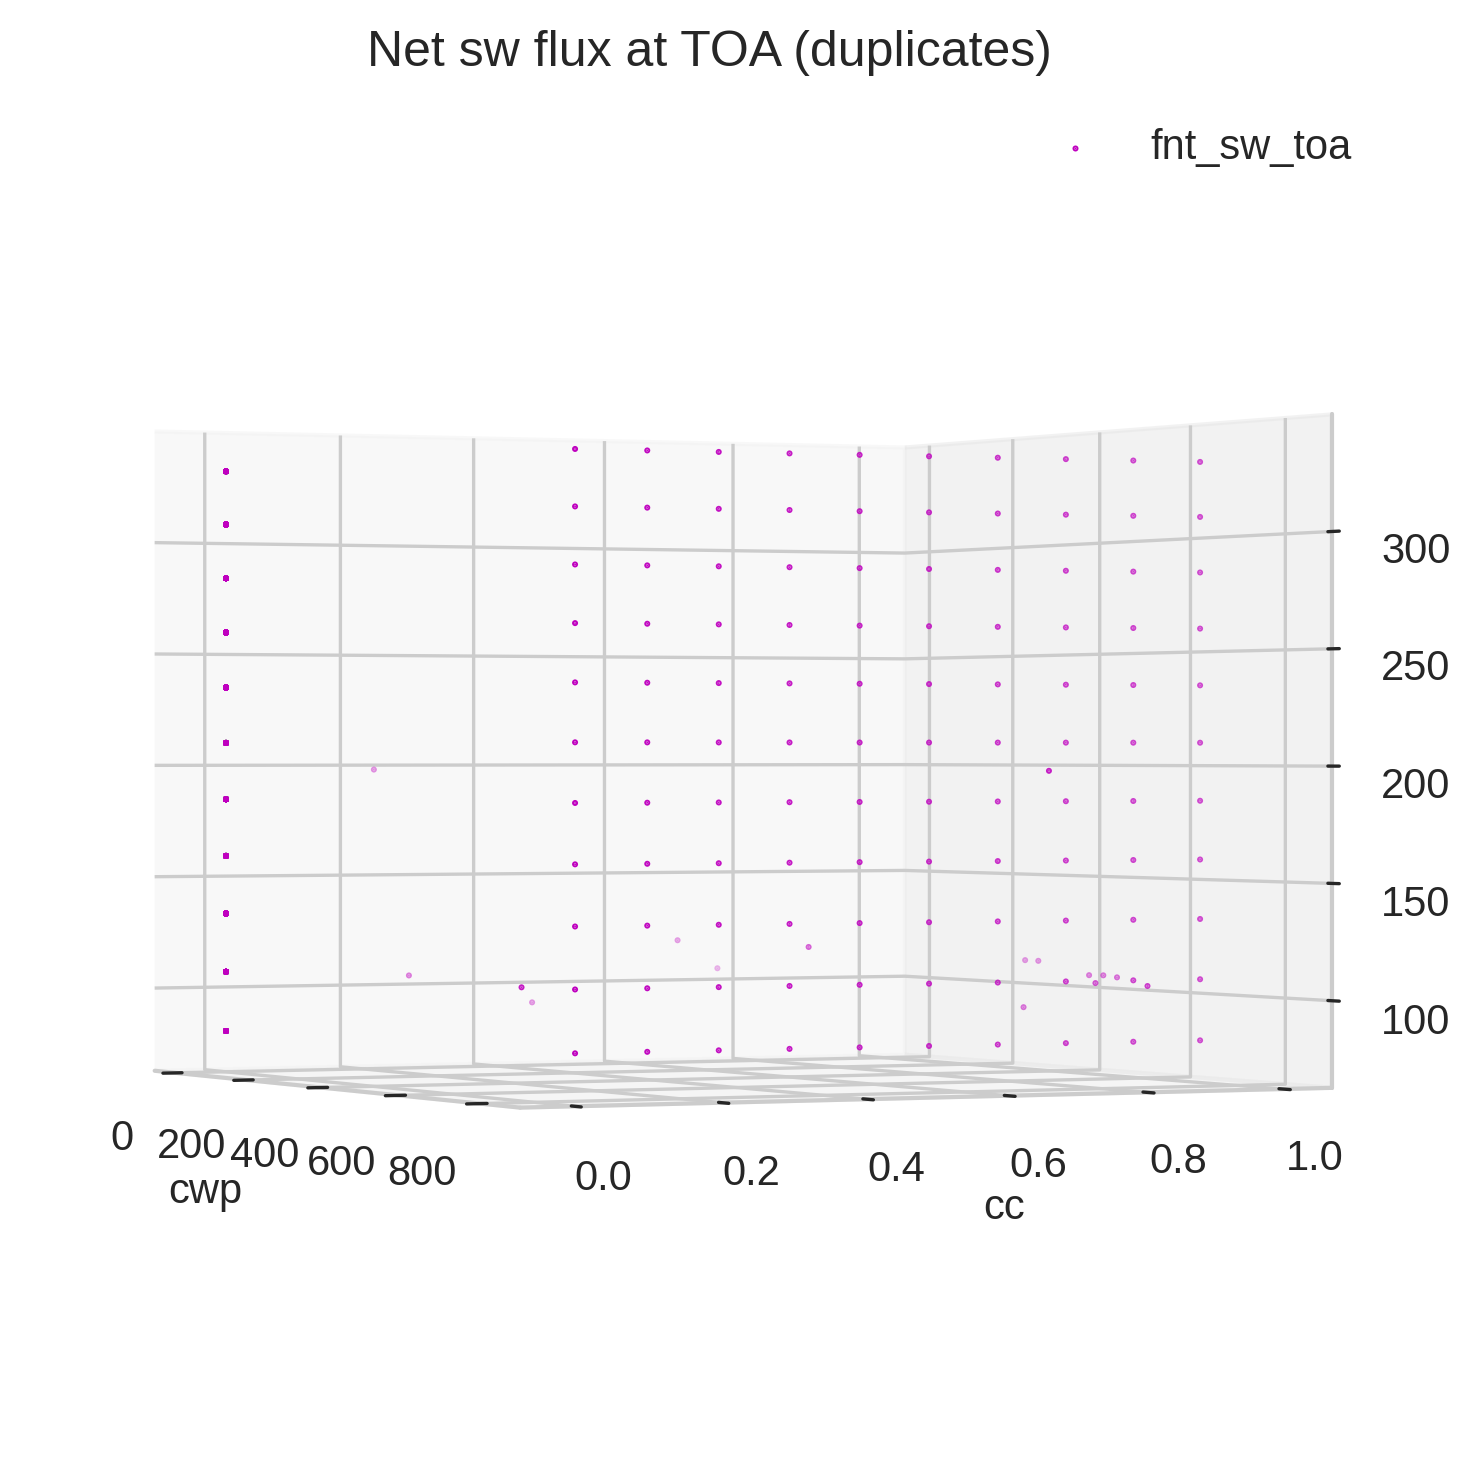

In [133]:
plt.figure(figsize=(6,6),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(duplicateRows.cwp,duplicateRows.cc,
            duplicateRows.fnt_sw_toa,label='fnt_sw_toa',s=0.2, color = 'm')
plt.legend(loc='upper right')
plt.title('Net sw flux at TOA (duplicates)')
plt.xlabel('cwp')
plt.ylabel('cc')

ax.view_init(0, 333) #333

plt.show()

In [113]:
maskk = duplicateRows.fnt_sw_toa == 81.133392

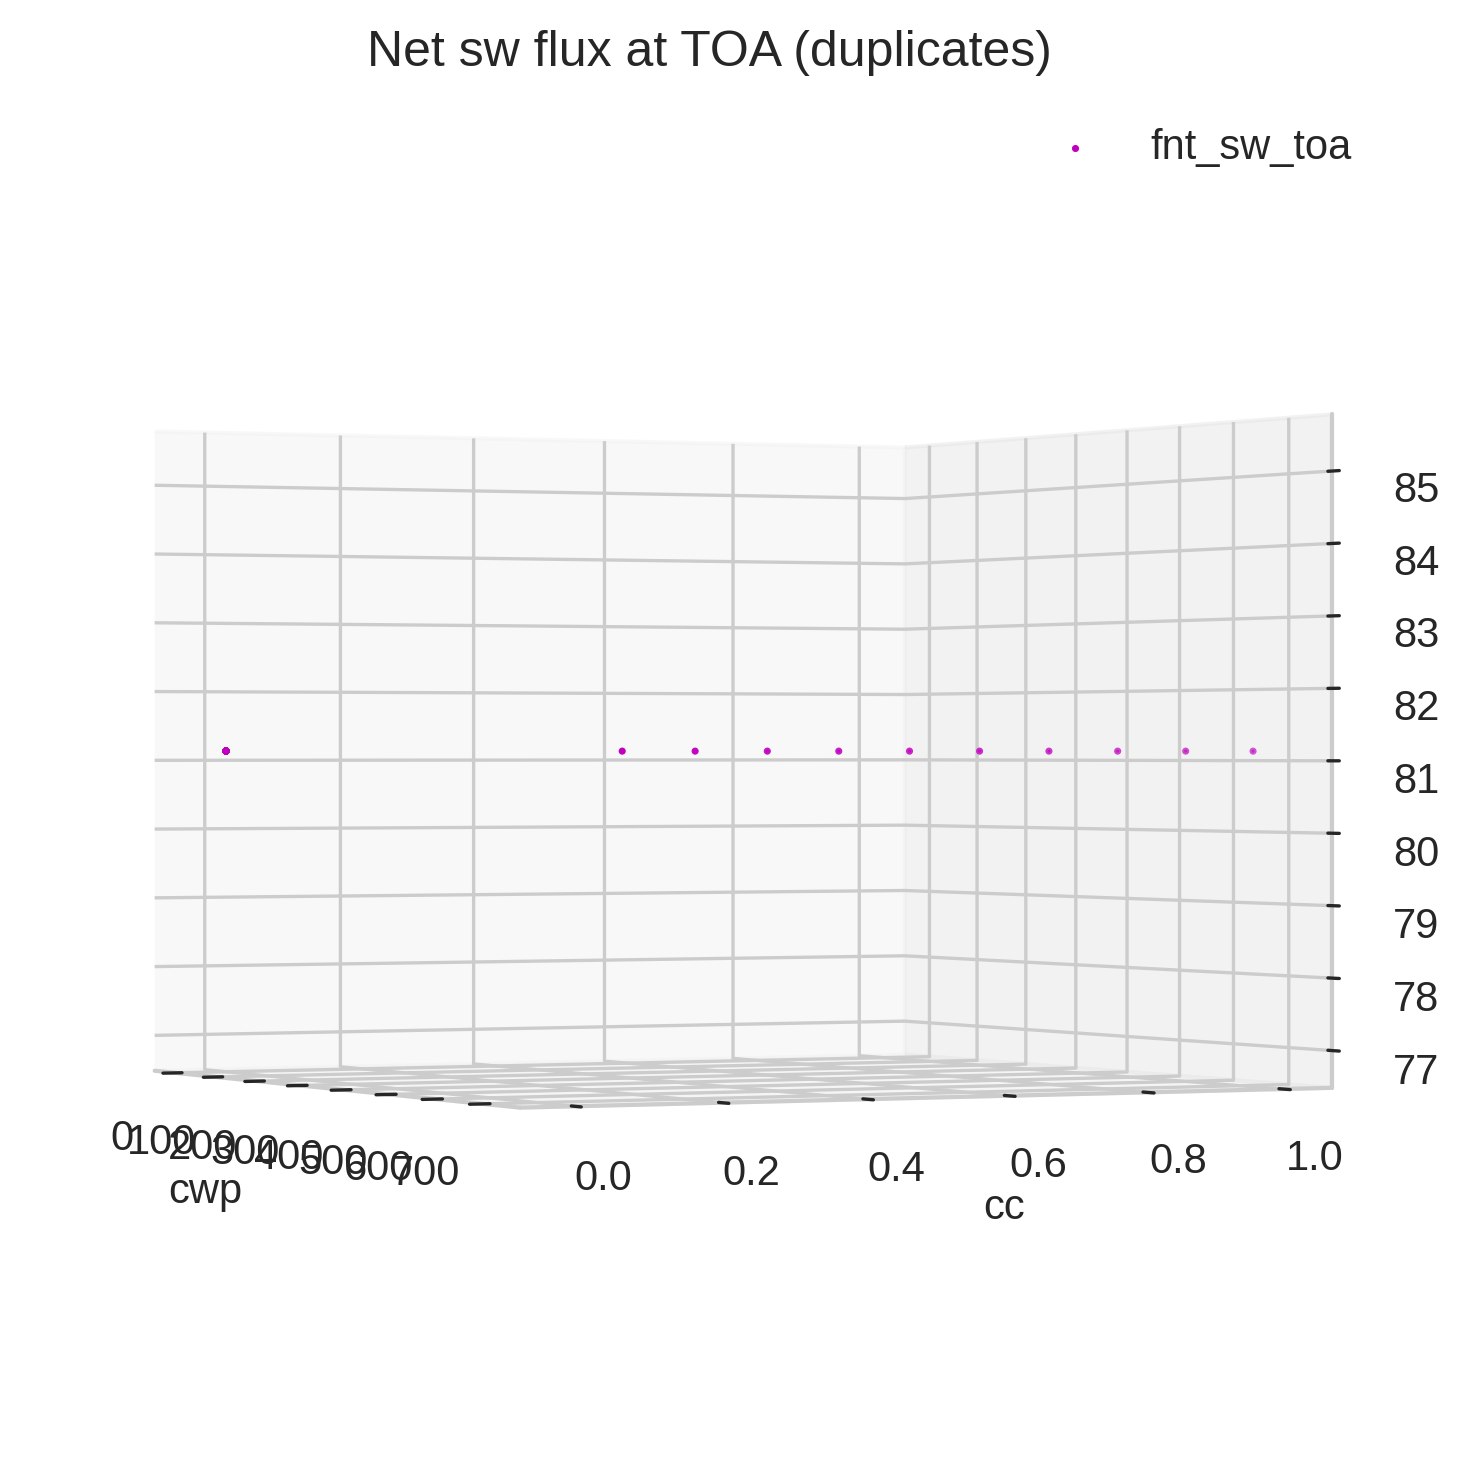

In [130]:
plt.figure(figsize=(6,6),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(duplicateRows[maskk].cwp,duplicateRows[maskk].cc,
            duplicateRows[maskk].fnt_sw_toa,label='fnt_sw_toa',s=0.5, color = 'm')
plt.legend(loc='upper right')
plt.title('Net sw flux at TOA (duplicates)')
plt.xlabel('cwp')
plt.ylabel('cc')

ax.view_init(0, 333) #333

plt.show()

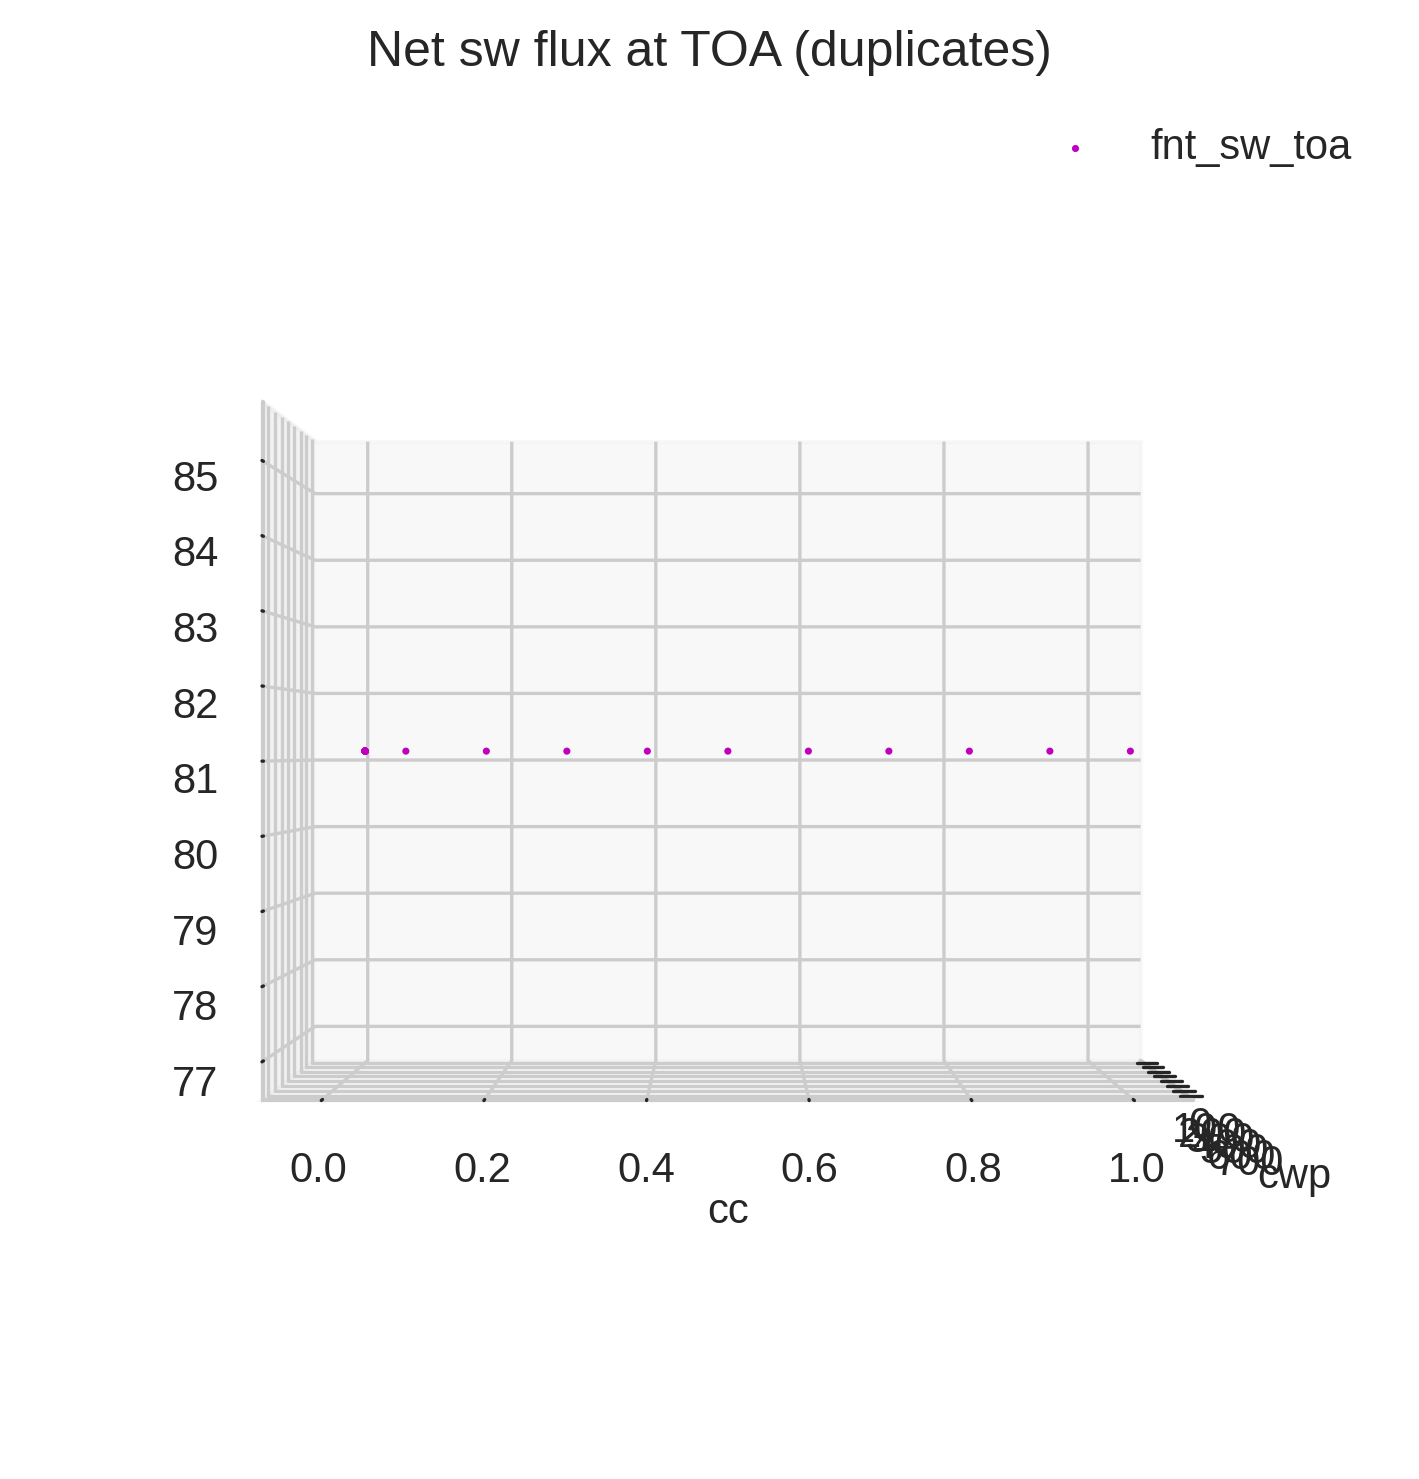

In [132]:
plt.figure(figsize=(6,6),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter3D(duplicateRows[maskk].cwp,duplicateRows[maskk].cc,
            duplicateRows[maskk].fnt_sw_toa,label='fnt_sw_toa',s=0.5, color = 'm')
plt.legend(loc='upper right')
plt.title('Net sw flux at TOA (duplicates)')
plt.xlabel('cwp')
plt.ylabel('cc')

ax.view_init(0, 360) #333

plt.show()